# Why does crime happen in Chicago? - Progress Report

## Intro

Our project revolves around the study of crime data in Chicago in 2022 to find out more about how safe the city is. We will examine whether the presence of alcohol establishments, primary schools, and law enforcement sentiment influences crime rates in different neighborhoods. In our view, understanding these relationships can facilitate development of specific strategies for reducing crime and making communities safer. Additionally, our research examines predictive analytics using machine learning which predicts possible future crimes based on factors such as: location, time, specifics (eg - neighborhoods). This study is aimed at offering insights to police departments and urban planners to better deploy their resources before the crimes occur. Moreover, we conduct an in-depth analysis of arrest data with a view to finding out patterns that exist across various types of crimes. Through this investigation, law enforcement practices will be informed, while intervention strategies will be improved upon for greater effectiveness. Thus, we aim to offer insights that can be put into action towards ensuring overall safety and well-being for all residents in Chicago.

## Changes since the proposal

One of the issues we faced was finding socio-economic data. The data that we found was limited and included past info, ie, from 2008 to 2012. Since we wanted to do a more recent analysis, we switched this subpart of the problem to alcohol establishments, which aims to see if there is a correlation between the crimes occurring in an area with the presence of such alcohol establishments. Another issue we ran into was how large the main dataset, Crimes Occurred in Chicago, was and thus we decided to look more deeply into the relations between crime and other factors for Chicago 2022, instead of looking from a high level across the years.

## Data

1. **<u>Crimes Occurred</u>** - The dataset is a list of any and all crimes committed from 2001 till present date. Since the dataset was huge, we extracted past year (2022) data from Chicago Data portal to look at relations between various factors affecting crime rate. Certain column types were changed, missing values were dropped, new columns were created. All this occurred as and when needed during EDA and visulization of our hypothesis such as 'What are the type 5 crimes committed per district?' and 'Is there a correlation between the type of crime committed and offender being arrested?' etc.
2. **<u>Arrests</u>** - This dataset provides a comprehensive overview of law enforcement arrest records from 2014 to 2023, encompassing unique identifiers for each case, precise arrest dates and times, and demographic details of the individuals arrested, such as race, age, and gender. It includes in-depth charge information, categorising offenses into types and classes and providing specific statute numbers. Out of these attributes, race and charge_type were used to figure out the trends of arrests. Column names were modified to remove the spaces and to making the casing consistent. Additional fields were derived from existing fields such as year for convenience. Data cleaning wasn’t required as there weren’t any NaN values in the attributes of interest.
3. **<u>Public Schools Progress Report</u>** - It provides information about a variety of aspects in Elementary, Middle, and High schools in Chicago. From this, we first extracted the information that was relevant in our case. Information about the type of school, location setting of the school, how supportive the environment is and how safe the school is are important factors that we are taking into consideration when evaluating what causes crime in various Chicago neighborhoods. We have also looked at how the attendance levels of teachers and students and the suspension rates change with how safe the school is perceived which will further provide insights into factors that are affected by crime in Chicago.
4. **<u>Police Sentiment Scores</u>** - Utilizing the Sodapy API, I imported sentiment data from the Chicago Police database, which includes information on safety and trust scores among different racial groups in neighborhoods. Also includes varoius classifications based on age, gender,income,respect .The data was segmented based on the respective collection years, and column data types were modified for better representation. A thorough data cleaning process was undertaken, addressing and managing any null values encountered in the dataset to enhance its reliability.
5. **<u>Alcohol Establishments</u>** - The Socrata library was used to get the data from the cityofchicago website. First, unneccessary columns were filtered out from the table, then the alcohol establishment locations were determined using the type of license and the rows were filtered out to include only these locations. We further had to clean the data so that the latitude and longitude were not null and were of type float to be able to be passed to the spatial plots.

## Data Analysis and Machine Learning

### Analysing different types of crimes that occurred in Chicago 2022 - Aayush Gupta

The data is extracted from Chicago Data Portal [Crimes - 2001 to Present](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2). We perform basic EDA to understand our data.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
crimes_occurred = pd.read_csv('data/Crimes_2022.csv')
crimes_occurred.head(5)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats,Wards 2023-
0,13024128,JG202134,12/31/2022 11:55:00 PM,055XX W ADAMS ST,1477,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,RESIDENCE - YARD (FRONT / BACK),False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12938426,JG100085,12/31/2022 11:50:00 PM,055XX W WASHINGTON BLVD,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,"(41.882256634, -87.763744015)",52.0,22216.0,26.0,674.0,7.0,32.0,25.0,97.0,29.0
2,12938337,JG100016,12/31/2022 11:50:00 PM,014XX W LUNT AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,ALLEY,False,False,...,"(42.009107852, -87.666843608)",3.0,21853.0,10.0,358.0,5.0,9.0,11.0,37.0,49.0
3,12938351,JG100087,12/31/2022 11:47:00 PM,091XX S LAFLIN ST,0560,ASSAULT,SIMPLE,STREET,True,False,...,"(41.72781203, -87.660399127)",18.0,21554.0,72.0,195.0,13.0,59.0,9.0,244.0,21.0
4,12938340,JG100005,12/31/2022 11:47:00 PM,091XX S LAFLIN ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,APARTMENT,True,False,...,"(41.72781203, -87.660399127)",18.0,21554.0,72.0,195.0,13.0,59.0,9.0,244.0,21.0


In [ ]:
crimes_occurred.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Historical Wards 2003-2015', 'Zip Codes',
       'Community Areas', 'Census Tracts', 'Wards', 'Boundaries - ZIP Codes',
       'Police Districts', 'Police Beats', 'Wards 2023-'],
      dtype='object')

In [ ]:
crime_total = crimes_occurred.loc[:, ['Primary Type']].value_counts().reset_index(name='Count')
crime_total

,Primary Type,Count
0,THEFT,54842
1,BATTERY,40922
2,CRIMINAL DAMAGE,27242
3,MOTOR VEHICLE THEFT,21448
4,ASSAULT,20803
5,DECEPTIVE PRACTICE,16515
6,OTHER OFFENSE,14572
7,ROBBERY,8964
8,WEAPONS VIOLATION,8775
9,BURGLARY,7595


C:\Users\gaayu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\gaayu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\gaayu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Offenses count in Chicago 2022')

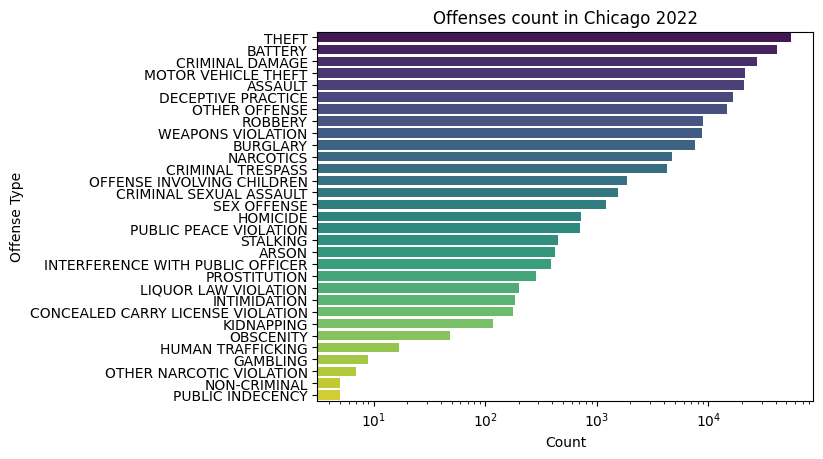

In [ ]:
axis = sns.barplot(crime_total, x='Count', y='Primary Type', palette='viridis')
axis.set_xscale('log')
axis.set_ylabel('Offense Type')
axis.set_title('Offenses count in Chicago 2022')

#### Observation

There are crimes in huge numbers as Theft, Battery, Criminal Damage etc. to as low as Gambling, Public Indecency. This leads to various questions:

1. What are the top 5 crimes per district?
2. Is there a correlation between the type of crime and arrest made?
3. Are there any specific districts which are crime hotspots? Any specific crimes that occur?
4. For any arrest made, is there a correlation between the type of crime and the ethnicity of the offender?

#### Top 5 crimes per district

In [ ]:
crimes_per_district = crimes_occurred.groupby(['Police Districts', 'Primary Type']).size().reset_index(name='Count')
crimes_per_district

,Police Districts,Primary Type,Count
0,1.0,ARSON,11
1,1.0,ASSAULT,554
2,1.0,BATTERY,1105
3,1.0,BURGLARY,312
4,1.0,CONCEALED CARRY LICENSE VIOLATION,1
...,...,...,...
586,25.0,ROBBERY,336
587,25.0,SEX OFFENSE,36
588,25.0,STALKING,11
589,25.0,THEFT,1111


In [ ]:
crimes_per_district = crimes_per_district.sort_values(by=['Police Districts', 'Count'], ascending=[True, False])
crimes_per_district['Police Districts'] = crimes_per_district['Police Districts'].astype(int)
top_5_district_crimes = crimes_per_district.groupby('Police Districts').head(5)
top_5_district_crimes

,Police Districts,Primary Type,Count
24,1,THEFT,1829
2,1,BATTERY,1105
5,1,CRIMINAL DAMAGE,819
1,1,ASSAULT,554
8,1,DECEPTIVE PRACTICE,532
...,...,...,...
569,25,BATTERY,1721
589,25,THEFT,1111
571,25,CRIMINAL DAMAGE,1042
581,25,MOTOR VEHICLE THEFT,903


C:\Users\gaayu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\gaayu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\gaayu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\gaayu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

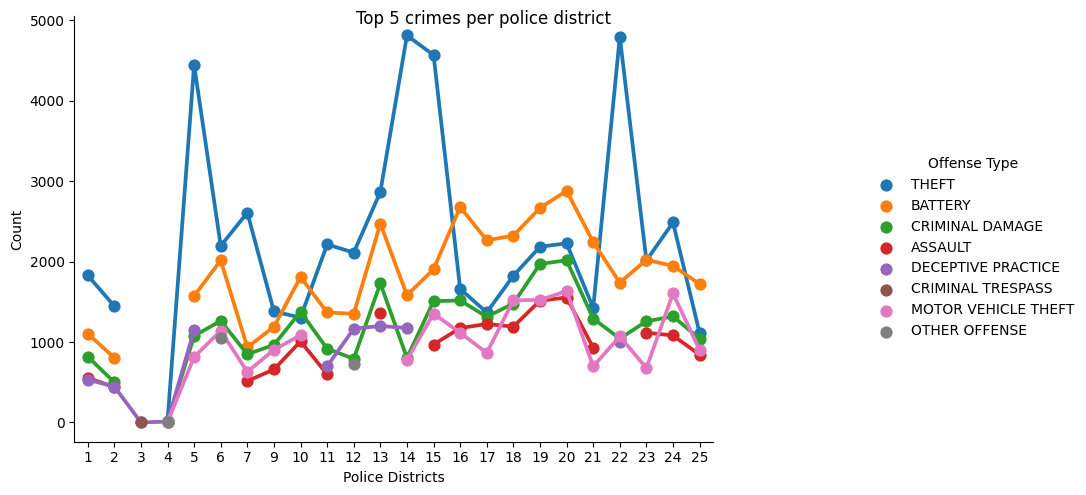

In [ ]:
axis = sns.catplot(top_5_district_crimes, y='Count', x='Police Districts', hue='Primary Type', kind='point')
axis.figure.set_figwidth(12)
axis.figure.suptitle('Top 5 crimes per police district')
legendObj = axis.legend
legendObj.set_title('Offense Type')

#### Observation

- As observed from before, Theft count is the highest, peaking in certain Police Districts. These districts can be considered as hotspots for crimes. We would need further analysis as to the motivation behind such high number of crimes occuring in 2022.

- Almost no crimes happened in District 3 and 4 in 2022? There can be 2 possible cases for a result like this -
    1. Almost no crimes did occur in those districts
    2. No crimes were reported by the citizens to the police in those districts

    This can be determined by looking at previous years crime data and see if there is a big difference between previous years' crime data and this data

#### Correlation between arrest made and type of crime

In [ ]:
arrest_crime = crimes_occurred.loc[:, ['Arrest', 'Primary Type']].groupby(['Primary Type', 'Arrest']).size().reset_index(name='count')
arrest_crime

,Primary Type,Arrest,count
0,ARSON,False,385
1,ARSON,True,37
2,ASSAULT,False,18796
3,ASSAULT,True,2007
4,BATTERY,False,34999
...,...,...,...
56,STALKING,True,28
57,THEFT,False,52827
58,THEFT,True,2015
59,WEAPONS VIOLATION,False,3385


In [ ]:
arrest_crime['total'] = arrest_crime.groupby('Primary Type')['count'].transform('sum')
arrest_crime['percent'] = (arrest_crime['count']/ arrest_crime['total']) * 100
arrest_crime

,Primary Type,Arrest,count,total,percent
0,ARSON,False,385,422,91.232227
1,ARSON,True,37,422,8.767773
2,ASSAULT,False,18796,20803,90.352353
3,ASSAULT,True,2007,20803,9.647647
4,BATTERY,False,34999,40922,85.526123
...,...,...,...,...,...
56,STALKING,True,28,447,6.263982
57,THEFT,False,52827,54842,96.325809
58,THEFT,True,2015,54842,3.674191
59,WEAPONS VIOLATION,False,3385,8775,38.575499


C:\Users\gaayu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\gaayu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\gaayu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\gaayu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

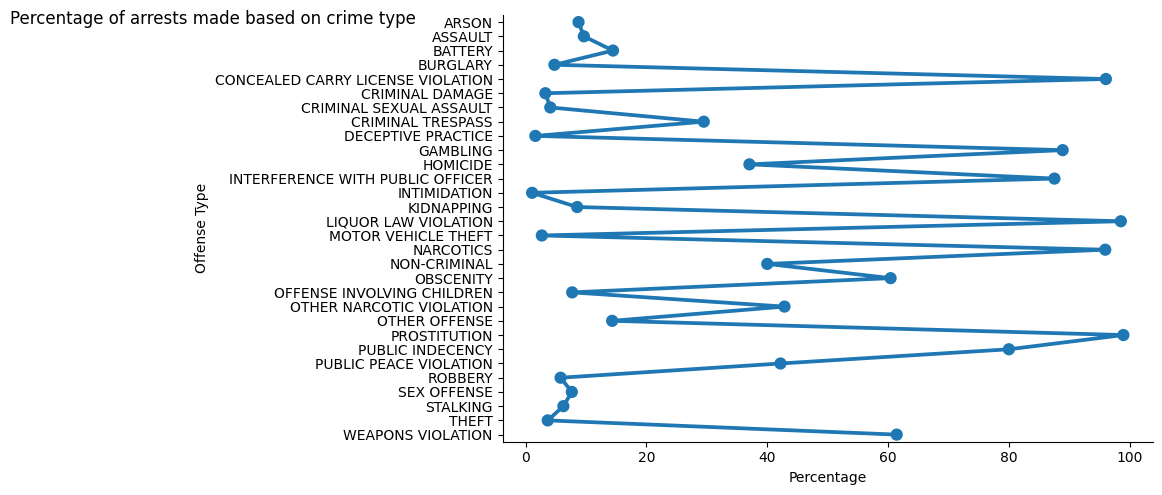

In [ ]:
axis = sns.catplot(arrest_crime[arrest_crime['Arrest']==True], y='Primary Type', x='percent', kind='point')
axis.figure.set_figwidth(20)
axis.figure.suptitle('Percentage of arrests made based on crime type')
axis.set_axis_labels('Percentage', 'Offense Type')

#### Observation

- Even though Theft is leading in number of crimes committed, almost none of the offenders are arrested. This may be due to various factors such as type of Theft that occurred, the socio-economic status of the area that the crime occurred, or even the offender is never caught etc. We can further dive into the different types of Theft cases that occurred and determine for what crime exactly does a person get arrested.
- Certain crimes results in almost always in an arrest. Such crimes are Liquor Law Violation, Concealed Carry License Violation, Prostitution etc. Even though they may be low in number, they do lead to an arrest.

#### Predicting if an arrest was made based on various factors

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

- Selecting features - Primary Type, Domestic, Location Description, Police Districts
- Target label - Arrest

In [ ]:
dt_df = crimes_occurred.loc[:, ['Primary Type', 'Arrest', 'Domestic', 'Location Description', 'Police Districts']]
print(f'Total number of rows: {dt_df.shape[0]}')
dt_df.head(5)

Total number of rows: 239028


,Primary Type,Arrest,Domestic,Location Description,Police Districts
0,WEAPONS VIOLATION,False,False,RESIDENCE - YARD (FRONT / BACK),NaN
1,BATTERY,False,True,APARTMENT,25.0
2,MOTOR VEHICLE THEFT,False,False,ALLEY,11.0
3,ASSAULT,True,False,STREET,9.0
4,WEAPONS VIOLATION,True,False,APARTMENT,9.0


Dropping NaN values

In [ ]:
dt_df = dt_df.dropna()
print(f'Total number of rows after dropping NaN values: {dt_df.shape[0]}')
dt_df.head(5)

Total number of rows after dropping NaN values: 231749


,Primary Type,Arrest,Domestic,Location Description,Police Districts
1,BATTERY,False,True,APARTMENT,25.0
2,MOTOR VEHICLE THEFT,False,False,ALLEY,11.0
3,ASSAULT,True,False,STREET,9.0
4,WEAPONS VIOLATION,True,False,APARTMENT,9.0
5,OTHER OFFENSE,False,False,APARTMENT,25.0


Changing dtypes to category for one-hot encoding

In [ ]:
dt_df['Primary Type'] = dt_df['Primary Type'].astype('category')
dt_df['Location Description'] = dt_df['Location Description'].astype('category')
dt_df['Police Districts'] = dt_df['Police Districts'].astype('category')
dt_df.dtypes

Primary Type            category
Arrest                      bool
Domestic                    bool
Location Description    category
Police Districts        category
dtype: object

In [ ]:
x, y = dt_df.loc[:, ['Primary Type', 'Domestic', 'Location Description', 'Police Districts']], dt_df['Arrest']

In [ ]:
x_encoded = pd.get_dummies(x, columns=['Primary Type', 'Location Description', 'Police Districts'])
x_encoded.head(5)

,Domestic,Primary Type_ARSON,Primary Type_ASSAULT,Primary Type_BATTERY,Primary Type_BURGLARY,Primary Type_CONCEALED CARRY LICENSE VIOLATION,Primary Type_CRIMINAL DAMAGE,Primary Type_CRIMINAL SEXUAL ASSAULT,Primary Type_CRIMINAL TRESPASS,Primary Type_DECEPTIVE PRACTICE,...,Police Districts_16.0,Police Districts_17.0,Police Districts_18.0,Police Districts_19.0,Police Districts_20.0,Police Districts_21.0,Police Districts_22.0,Police Districts_23.0,Police Districts_24.0,Police Districts_25.0
1,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.3, random_state=15)

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=15)
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=15)

In [ ]:
y_pred = dt_clf.predict(x_test)

In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.9163897878460985

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.93      0.98      0.95     61587
        True       0.74      0.42      0.53      7938

    accuracy                           0.92     69525
   macro avg       0.83      0.70      0.74     69525
weighted avg       0.91      0.92      0.91     69525



Using cross-validation to check overfitting

In [ ]:
cvs = cross_val_score(dt_clf, x_train, y_train, cv=10, n_jobs=-1)
cvs

array([0.91468902, 0.91173026, 0.91419589, 0.91653825, 0.91659475,
       0.91086179, 0.91295771, 0.91345087, 0.91369745, 0.91671804])

### Analysing crimes and arrests that occurred in Chicago 2013-2023 - Daniel Abraham

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [ ]:
arrests = pd.read_csv('Arrests.csv')
crimes = pd.read_csv('Crimes.csv')
arrests.columns=["cb_no","case_number","arrest_date","race","charge_1_statute","charge_1_description","charge_1_type","charge_1_class","charge_2_statute","charge_2_description","charge_2_type","charge_2_class","charge_3_statute","charge_3_description","charge_3_type","charge_3_class","charge_4_statute","charge_4_description","charge_4_type","charge_4_class","charges_statute","charges_description","charges_type","charges_class","boundaries_zip_codes","community_areas","zip_codes","census_tracts","wards"]
crimes.columns=["id","case_number","date","block","iucr","primary_type","description","location_description","arrest","domestic","beat","district","ward","community_area","fbi_code","x_coordinate","y_coordinate","year","updated_on","latitude","longitude","location","historical_wards_2003_2015","zip_codes","community_areas","census_tracts","wards","boundaries_zip_codes","police_districts","police_beats","wards_2023"]

arrests['arrest_date'] = pd.to_datetime(arrests['arrest_date'], format='%m/%d/%Y %I:%M:%S %p')
arrests['year'] = arrests['arrest_date'].dt.year

In [ ]:
arrests.head(5)

,cb_no,case_number,arrest_date,race,charge_1_statute,charge_1_description,charge_1_type,charge_1_class,charge_2_statute,charge_2_description,...,charges_statute,charges_description,charges_type,charges_class,boundaries_zip_codes,community_areas,zip_codes,census_tracts,wards,year
0,30293871,JG486495,2023-10-31 09:07:00,BLACK,430 ILCS 66.0/10-H,FCCL FL DISCL CONCEALED FIR,M,B,NaN,NaN,...,430 ILCS 66.0/10-H | | |,FCCL FL DISCL CONCEALED FIR | | |,M | | |,B | | |,NaN,NaN,NaN,NaN,NaN,2023
1,30293867,JG486562,2023-10-31 23:45:00,BLACK,720 ILCS 570.0/402-C,PCS - POSSESSION - POSS AMT CON SUB EXCEPT (A)(D),F,4,7-24-099(B)(4),POSS CANNABIS IN PRIV VEH NOT IN SEALED CONTAINER,...,720 ILCS 570.0/402-C | 7-24-099(B)(4) | |,PCS - POSSESSION - POSS AMT CON SUB EXCEPT (A)...,F | | |,4 | L | |,NaN,NaN,NaN,NaN,NaN,2023
2,30293859,JG483980,2023-10-31 22:00:00,BLACK,720 ILCS 5.0/21-2-A,CRIM TRES TO VEH/PHY CONTROL,M,A,725 ILCS 5.0/110-3,ISSUANCE OF WARRANT,...,720 ILCS 5.0/21-2-A | 725 ILCS 5.0/110-3 | |,CRIM TRES TO VEH/PHY CONTROL | ISSUANCE OF WAR...,M | | |,A | Z | |,NaN,NaN,NaN,NaN,NaN,2023
3,30293858,JG486446,2023-10-31 20:36:00,WHITE HISPANIC,720 ILCS 5.0/12-3-A-1,BATTERY - CAUSE BODILY HARM,M,A,NaN,NaN,...,720 ILCS 5.0/12-3-A-1 | | |,BATTERY - CAUSE BODILY HARM | | |,M | | |,A | | |,NaN,NaN,NaN,NaN,NaN,2023
4,30293857,JG486537,2023-10-31 22:42:00,BLACK,720 ILCS 570.0/402-C,PCS - POSSESSION - POSS AMT CON SUB EXCEPT (A)(D),F,4,4-64-350,CERTAIN TRANSACTIONS - PROHIBITED,...,720 ILCS 570.0/402-C | 4-64-350 | |,PCS - POSSESSION - POSS AMT CON SUB EXCEPT (A)...,F | | |,4 | L | |,NaN,NaN,NaN,NaN,NaN,2023


In [ ]:
arrests.columns

Index(['cb_no', 'case_number', 'arrest_date', 'race', 'charge_1_statute',
       'charge_1_description', 'charge_1_type', 'charge_1_class',
       'charge_2_statute', 'charge_2_description', 'charge_2_type',
       'charge_2_class', 'charge_3_statute', 'charge_3_description',
       'charge_3_type', 'charge_3_class', 'charge_4_statute',
       'charge_4_description', 'charge_4_type', 'charge_4_class',
       'charges_statute', 'charges_description', 'charges_type',
       'charges_class', 'boundaries_zip_codes', 'community_areas', 'zip_codes',
       'census_tracts', 'wards', 'year'],
      dtype='object')

In [ ]:
crimes.columns

Index(['id', 'case_number', 'date', 'block', 'iucr', 'primary_type',
       'description', 'location_description', 'arrest', 'domestic', 'beat',
       'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate',
       'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude',
       'location', 'historical_wards_2003_2015', 'zip_codes',
       'community_areas', 'census_tracts', 'wards', 'boundaries_zip_codes',
       'police_districts', 'police_beats', 'wards_2023'],
      dtype='object')

#### EDA 1 : Arrest trends and distributions across different racial groups over time.

The graph presents a horizontal stacked bar chart showing the distribution of arrests categorized by race for each year. The data has been consolidated such that all races except for "Black," "White Hispanic," and "White" are grouped into an "Other" category for clarity. Each horizontal bar represents a year, and the lengths of the colored segments within these bars correspond to the number of arrests for each racial category. The segments within the bars are ordered by the count of arrests in non-increasing order, meaning the race with the most arrests is placed leftmost within each bar, providing an immediate visual cue as to which race experienced the highest number of arrests in any given year.

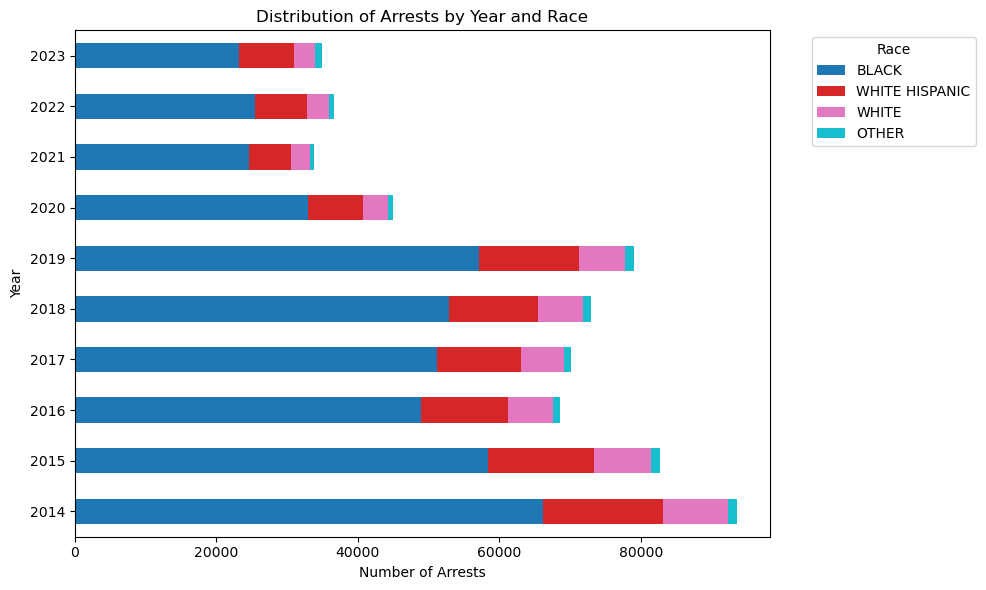

In [ ]:
races_to_keep = ['BLACK', 'WHITE HISPANIC', 'WHITE']
arrests['race_updt'] = arrests['race'].where(arrests['race'].isin(races_to_keep), 'OTHER')

pivot_df = arrests.groupby(['year', 'race_updt']).size().unstack(fill_value=0)

sorted_columns = pivot_df.sum().sort_values(ascending=False).index
pivot_df = pivot_df[sorted_columns]

pivot_df.plot(kind='barh', stacked=True, figsize=(10, 6), cmap='tab10')
plt.title('Distribution of Arrests by Year and Race')
plt.xlabel('Number of Arrests')
plt.ylabel('Year')
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


#### EDA 2 : Frequencies of different arrest charge types over the years.

This line graph depicts the annual trend of felony and misdemeanor charges based on arrest records over a span of years. Each line represents one of the charge types, with felonies and misdemeanors distinctly marked.

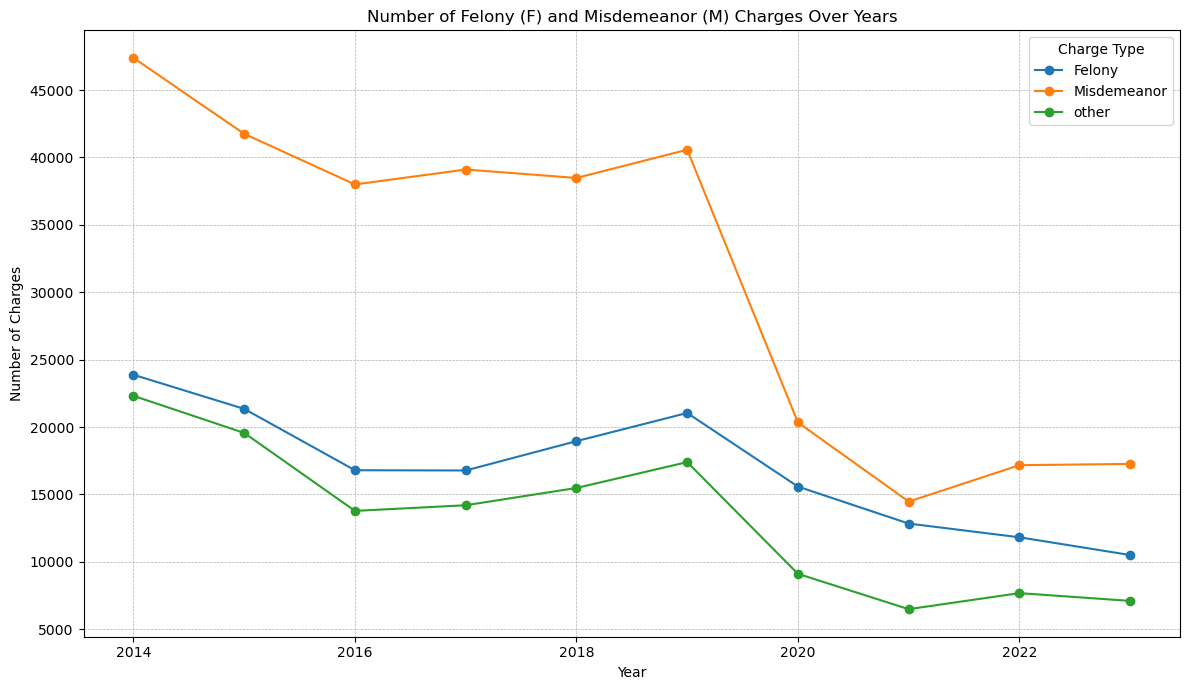

In [ ]:
charges_to_keep = ['F', 'M']
arrests['charge_updt'] = arrests['charge_1_type'].where(arrests['charge_1_type'].isin(charges_to_keep), 'other')
charge_counts_by_year = arrests.groupby(['year', 'charge_updt']).size().unstack().fillna(0)
charge_counts_by_year = charge_counts_by_year.rename(columns={'F': 'Felony', 'M': 'Misdemeanor'})

charge_counts_by_year.plot(figsize=(12, 7), marker='o')
plt.title('Number of Felony (F) and Misdemeanor (M) Charges Over Years')
plt.ylabel('Number of Charges')
plt.xlabel('Year')
plt.legend(title='Charge Type')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

#### Hypothesis 1 : Most crimes happen during the summer months.

Exploring this hypothesis can provide insights into the underlying causes of crime. For instance, heat stress is thought to increase aggression in some individuals, or longer daylight hours might offer more opportunities for certain crimes. Such knowledge is vital for addressing the root causes of crime

This line graph illustrates the number of crimes reported each month over several years, with the overall trend denoted by a continuous line. The highest crime count in a month for an year is clearly marked by a red dot. As we can notice, most years have higher crimes during the summer months (June - September).

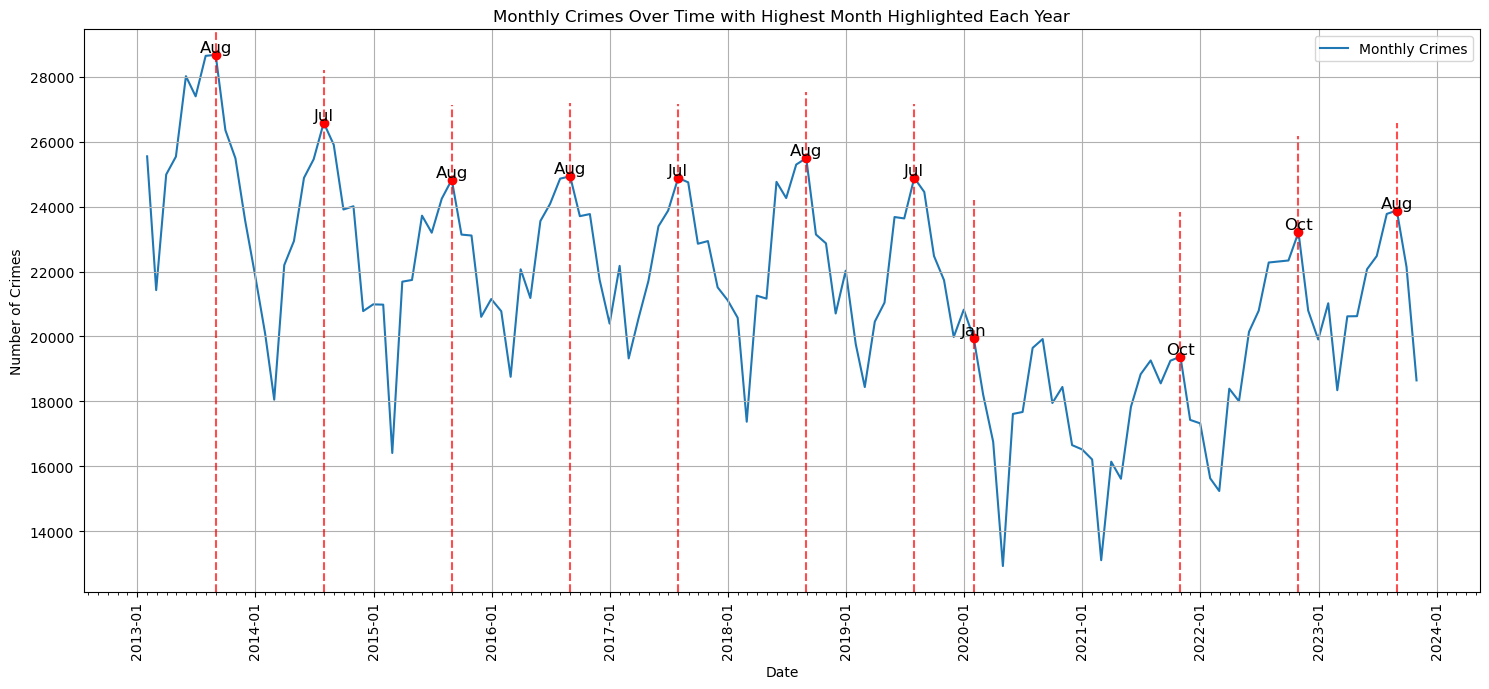

In [ ]:
crimes['datef'] = pd.to_datetime(crimes['date'])
crimes.set_index('datef', inplace=True)
monthly_crimes = crimes.resample('M').size()

annual_max = monthly_crimes.resample('A').max()

max_crime_months = monthly_crimes[monthly_crimes.isin(annual_max)]

plt.figure(figsize=(15, 7))
plt.plot(monthly_crimes.index, monthly_crimes, label='Monthly Crimes', zorder=1)

for date, value in max_crime_months.items():
    plt.scatter(date, value, color='red', zorder=2)
    plt.axvline(x=date, color='red', linestyle='--', alpha=0.7, ymin=0, ymax=(value/monthly_crimes.max()), zorder=2)

    plt.text(date, value, date.strftime('%b'), color='black', fontsize=12, ha='center', va='bottom')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())
plt.title('Monthly Crimes Over Time with Highest Month Highlighted Each Year')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.legend()
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


#### Hypothesis 2 : Theft-related crimes are more frequent on weekends compared to weekdays.

Understanding when theft-related crimes are more likely to occur can help law enforcement agencies allocate resources more effectively. If there is a discernible pattern that indicates an increase in thefts over weekends, police can increase patrols or presence in high-risk areas during those times.

The bar chart compares the frequency of theft-related crimes occurring on weekdays versus weekends. It categorizes offenses such as theft, robbery, burglary, and motor vehicle theft, providing a clear visual representation of when these crimes are more likely to happen. The blue bar represents the total count of theft-related crimes reported on weekdays, while the orange bar represents the count for weekends.

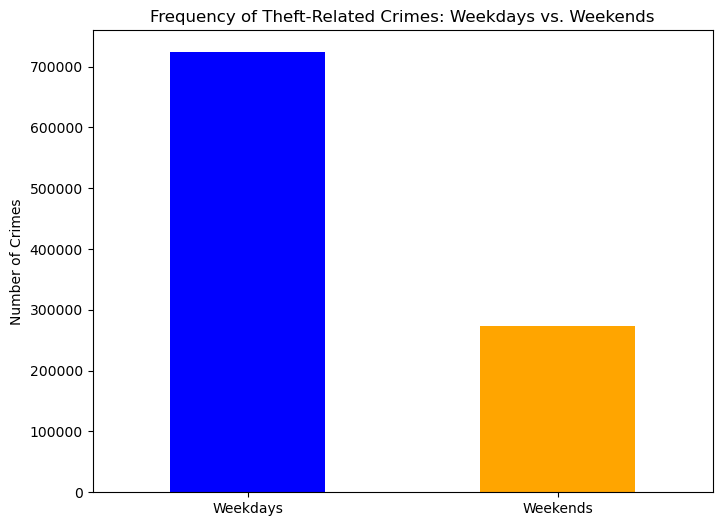

In [ ]:
crimes['datef1'] = pd.to_datetime(crimes['date'], format='%m/%d/%Y %I:%M:%S %p')

crimes['day_of_week'] = crimes['datef1'].dt.dayofweek
crimes['weekend/weekday'] = crimes['day_of_week'].isin([5, 6])

theft_related_categories = ["THEFT", "ROBBERY", "BURGLARY", "MOTOR VEHICLE THEFT"]
theft_related_crimes = crimes[crimes['primary_type'].isin(theft_related_categories)]

theft_counts = theft_related_crimes['weekend/weekday'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
theft_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Frequency of Theft-Related Crimes: Weekdays vs. Weekends')
plt.xticks(ticks=[0, 1], labels=['Weekdays', 'Weekends'], rotation=0)
plt.ylabel('Number of Crimes')
plt.show()


In [ ]:
crimes['primary_type'].unique()

array(['DECEPTIVE PRACTICE', 'SEX OFFENSE', 'OFFENSE INVOLVING CHILDREN',
       'CRIM SEXUAL ASSAULT', 'CRIMINAL SEXUAL ASSAULT', 'BATTERY',
       'CRIMINAL DAMAGE', 'BURGLARY', 'THEFT', 'OTHER OFFENSE',
       'STALKING', 'HUMAN TRAFFICKING', 'CRIMINAL TRESPASS',
       'MOTOR VEHICLE THEFT', 'ROBBERY', 'ASSAULT', 'WEAPONS VIOLATION',
       'NARCOTICS', 'INTERFERENCE WITH PUBLIC OFFICER',
       'LIQUOR LAW VIOLATION', 'PUBLIC PEACE VIOLATION', 'HOMICIDE',
       'ARSON', 'OBSCENITY', 'KIDNAPPING', 'PROSTITUTION', 'INTIMIDATION',
       'GAMBLING', 'NON-CRIMINAL', 'PUBLIC INDECENCY',
       'OTHER NARCOTIC VIOLATION', 'NON - CRIMINAL',
       'CONCEALED CARRY LICENSE VIOLATION',
       'NON-CRIMINAL (SUBJECT SPECIFIED)', 'RITUALISM'], dtype=object)

In [ ]:
crimes['location_description'].unique()

array(['OTHER (SPECIFY)', 'RESIDENCE', 'SCHOOL - PUBLIC BUILDING',
       'APARTMENT', 'SPORTS ARENA / STADIUM', 'DRUG STORE',
       'RESIDENCE-GARAGE', 'SMALL RETAIL STORE', 'ALLEY',
       'DEPARTMENT STORE', 'WAREHOUSE', 'CURRENCY EXCHANGE', 'OTHER',
       'SCHOOL, PUBLIC, GROUNDS', 'STREET', 'HOSPITAL BUILDING/GROUNDS',
       'BAR OR TAVERN', 'SIDEWALK', 'RESIDENTIAL YARD (FRONT/BACK)',
       'RESTAURANT', 'GOVERNMENT BUILDING/PROPERTY', 'BANK',
       'GROCERY FOOD STORE', 'GAS STATION', 'VEHICLE NON-COMMERCIAL', nan,
       'PARKING LOT/GARAGE(NON.RESID.)', 'RESIDENCE PORCH/HALLWAY',
       'TAXICAB', 'ATM (AUTOMATIC TELLER MACHINE)', 'HOTEL/MOTEL',
       'TAVERN/LIQUOR STORE', 'FACTORY/MANUFACTURING BUILDING',
       'CTA PLATFORM', 'CHA APARTMENT', 'CTA BUS', 'MOVIE HOUSE/THEATER',
       'CHA PARKING LOT/GROUNDS', 'NURSING HOME/RETIREMENT HOME',
       'POLICE FACILITY/VEH PARKING LOT', 'CTA GARAGE / OTHER PROPERTY',
       'CAR WASH', 'AIRPORT TERMINAL UPPER LEVEL - SECU

In [ ]:
crimes['district'].unique()

array([19., 11., 25., 14.,  4.,  3., 10., 22.,  8., 17., 12., 16., 15.,
        6., 18.,  9.,  7.,  5.,  1., 24.,  2., 20., 31., nan])

In [ ]:
crimes['beat'].unique()

In [ ]:
crimes_2020 = crimes[crimes.index.year == 2020]
crimes_2020=crimes_2020.loc[:,['primary_type','location_description','date','district','beat']]
crimes_2020=crimes_2020[(crimes_2020['primary_type']!='RITUALISM') & (crimes_2020['primary_type']!='NON-CRIMINAL')]

In [ ]:
crimes_2020['beat'].unique()

array([ 814, 1113,  811,  323, 1233, 1911, 1633,  533, 1613,  833, 1211,
        611,  423,  424,  224,  813,  422, 1023, 1014,  911, 2212, 1833,
       1012,  815,  711, 1114, 2012, 1235, 1024,  324, 1434, 2233, 1814,
       1913, 1022, 1231,  413,  612, 1915, 2512, 2232, 2423, 1631,  631,
        632,  532, 1121, 1431,  321, 1522,  932,  912, 2013,  915,  714,
        331, 2532,  614,  433, 1122, 2525,  624, 2213, 1650,  421, 1812,
        132, 1412, 1011, 1831,  735, 2514, 1135, 1623, 1134,  211,  715,
        312, 2515, 1511,  222, 2023, 1124, 1924, 1922,  831, 2221, 1132,
        522,  523, 1215,  313,  925, 1034, 1934,  835,  221, 1724, 1524,
       1433, 1612, 1131,  914, 1933,  812, 2422,  613, 1533, 1614,  923,
        214, 1232, 2531, 2031,  414, 1923, 1834, 1832,  322, 2234, 1213,
        931, 1624, 1422, 1112,  821, 1731,  123, 1222,  824, 1424, 1234,
        314, 1423,  511,  432,  531, 1723, 1123,  111,  633,  725,  913,
        114, 1021,  524, 1133, 1932,  634,  512, 16

In [ ]:
crimes_2020['primary_type'].value_counts()

BATTERY                              41514
THEFT                                41324
CRIMINAL DAMAGE                      24877
DECEPTIVE PRACTICE                   18334
ASSAULT                              18253
OTHER OFFENSE                        12594
MOTOR VEHICLE THEFT                   9959
BURGLARY                              8758
WEAPONS VIOLATION                     8432
ROBBERY                               7855
NARCOTICS                             7492
CRIMINAL TRESPASS                     4177
OFFENSE INVOLVING CHILDREN            1998
PUBLIC PEACE VIOLATION                1271
CRIMINAL SEXUAL ASSAULT               1168
SEX OFFENSE                            963
HOMICIDE                               796
INTERFERENCE WITH PUBLIC OFFICER       654
ARSON                                  588
PROSTITUTION                           277
STALKING                               203
INTIMIDATION                           163
CONCEALED CARRY LICENSE VIOLATION      148
LIQUOR LAW 

In [ ]:
crimes.head()

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,wards,boundaries_zip_codes,police_districts,police_beats,wards_2023,datef1,day_of_week,weekend/weekday,primary_type_encoded,primary_type_grouped
datef,,,,,,,,,,,,,,,,,,,,,
2013-01-01,12195649,JD402083,01/01/2013 12:00:00 AM,037XX N LAKE SHORE DR,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,OTHER (SPECIFY),False,False,...,NaN,NaN,NaN,NaN,NaN,2013-01-01,1,False,9,9
2013-01-01,12026394,JD204947,01/01/2013 12:00:00 AM,028XX W LEXINGTON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,NaN,NaN,NaN,NaN,NaN,2013-01-01,1,False,9,9
2013-01-01,13233056,JG450599,01/01/2013 12:00:00 AM,020XX N LAMON AVE,1562,SEX OFFENSE,AGGRAVATED CRIMINAL SEXUAL ABUSE,SCHOOL - PUBLIC BUILDING,False,False,...,NaN,NaN,NaN,NaN,NaN,2013-01-01,1,False,31,31
2013-01-01,12311312,JE164185,01/01/2013 12:00:00 AM,013XX N HOMAN AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,...,NaN,NaN,NaN,NaN,NaN,2013-01-01,1,False,23,23
2013-01-01,11607783,JC166670,01/01/2013 12:00:00 AM,011XX S INDEPENDENCE BLVD,0266,CRIM SEXUAL ASSAULT,PREDATORY,APARTMENT,True,False,...,NaN,NaN,NaN,NaN,NaN,2013-01-01,1,False,5,5


In [ ]:
crimes_2020.head()

,primary_type,location_description,date,district,beat
datef,,,,,
2020-01-01,CRIMINAL SEXUAL ASSAULT,APARTMENT,01/01/2020 12:00:00 AM,8.0,814
2020-01-01,CRIMINAL SEXUAL ASSAULT,RESIDENCE,01/01/2020 12:00:00 AM,11.0,1113
2020-01-01,DECEPTIVE PRACTICE,RESIDENCE,01/01/2020 12:00:00 AM,8.0,811
2020-01-01,OFFENSE INVOLVING CHILDREN,APARTMENT,01/01/2020 12:00:00 AM,3.0,323
2020-01-01,OFFENSE INVOLVING CHILDREN,RESIDENCE,01/01/2020 12:00:00 AM,12.0,1233


### Analysing the trust and safety scores of people on police of chicago - Dhwani Shingala

In [ ]:
pip install sodapy

  Using cached sodapy-2.2.0-py2.py3-none-any.whl (15 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
from sodapy import Socrata
import numpy as np
import matplotlib.pyplot as plt

The data is used from Police Sentiment Records - Chicago Data Portal

In [ ]:
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofchicago.org", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofchicago.org,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

#returned as JSON from API / converted to Python list of dictionaries by sodapy.
#limit of 7266 because thats the number of rows

results = client.get("28me-84fj",limit = 7266)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)
results_df.head(5)

,org_level,city,area,district,sector,safety,s_race_african_american,s_race_asian_american,s_race_hispanic,s_race_white,...,t_respect_sex_female,t_respect_sex_male,t_respect_education_low,t_respect_education_medium,t_respect_education_high,t_respect_income_low,t_respect_income_medium,t_respect_income_high,start_date,end_date
0,Other,chicago,area_1,2,210,57.54,54.8,64.48,45.86,81.63,...,59.53,77.46,65.43,61.53,74.63,58.9,57.61,84.76,2023-09-01T00:00:00.000,2023-09-30T00:00:00.000
1,Other,chicago,area_1,2,220,54.89,50.43,64.57,50.86,75.33,...,53.33,65.35,64.08,55.66,60.26,52,60.27,69.43,2023-09-01T00:00:00.000,2023-09-30T00:00:00.000
2,Other,chicago,area_1,2,230,57.63,58.82,64.91,44,62.59,...,53.75,57.47,45.51,59.49,54.42,53.02,55.19,63.99,2023-09-01T00:00:00.000,2023-09-30T00:00:00.000
3,Other,chicago,area_1,2,NaN,56.69,54.68,64.65,46.9,73.18,...,55.54,66.76,58.34,58.89,63.1,54.64,57.69,72.73,2023-09-01T00:00:00.000,2023-09-30T00:00:00.000
4,Other,chicago,area_1,3,310,53.57,54.06,71.54,53.97,64.19,...,50.97,54.51,49.67,53.56,73.36,50.52,50.32,72.66,2023-09-01T00:00:00.000,2023-09-30T00:00:00.000


In [ ]:
np.shape(results_df)

(7266, 77)

In [ ]:
results_df.columns

Index(['org_level', 'city', 'area', 'district', 'sector', 'safety',
       's_race_african_american', 's_race_asian_american', 's_race_hispanic',
       's_race_white', 's_race_other', 's_age_low', 's_age_medium',
       's_age_high', 's_sex_female', 's_sex_male', 's_education_low',
       's_education_medium', 's_education_high', 's_income_low',
       's_income_medium', 's_income_high', 'trust', 't_race_african_american',
       't_race_asian_american', 't_race_hispanic', 't_race_white',
       't_race_other', 't_age_low', 't_age_medium', 't_age_high',
       't_sex_female', 't_sex_male', 't_education_low', 't_education_medium',
       't_education_high', 't_income_low', 't_income_medium', 't_income_high',
       't_listen', 't_listen_race_african_american',
       't_listen_race_asian_american', 't_listen_race_hispanic',
       't_listen_race_white', 't_listen_race_other', 't_listen_age_low',
       't_listen_age_medium', 't_listen_age_high', 't_listen_sex_female',
       't_listen_

In [ ]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7266 entries, 0 to 7265
Data columns (total 77 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   org_level                        7266 non-null   object
 1   city                             7266 non-null   object
 2   area                             7044 non-null   object
 3   district                         6461 non-null   object
 4   sector                           4899 non-null   object
 5   safety                           7266 non-null   object
 6   s_race_african_american          7266 non-null   object
 7   s_race_asian_american            7266 non-null   object
 8   s_race_hispanic                  7266 non-null   object
 9   s_race_white                     7266 non-null   object
 10  s_race_other                     7266 non-null   object
 11  s_age_low                        7266 non-null   object
 12  s_age_medium                     7

In [ ]:
#seperating year and month in the data for further use
results_df['Year'] = pd.to_datetime(results_df['start_date']).dt.year
results_df['month'] = pd.to_datetime(results_df['start_date']).dt.month
results_df


,org_level,city,area,district,sector,safety,s_race_african_american,s_race_asian_american,s_race_hispanic,s_race_white,...,t_respect_education_low,t_respect_education_medium,t_respect_education_high,t_respect_income_low,t_respect_income_medium,t_respect_income_high,start_date,end_date,Year,month
0,Other,chicago,area_1,2,210,57.54,54.8,64.48,45.86,81.63,...,65.43,61.53,74.63,58.9,57.61,84.76,2023-09-01T00:00:00.000,2023-09-30T00:00:00.000,2023,9
1,Other,chicago,area_1,2,220,54.89,50.43,64.57,50.86,75.33,...,64.08,55.66,60.26,52,60.27,69.43,2023-09-01T00:00:00.000,2023-09-30T00:00:00.000,2023,9
2,Other,chicago,area_1,2,230,57.63,58.82,64.91,44,62.59,...,45.51,59.49,54.42,53.02,55.19,63.99,2023-09-01T00:00:00.000,2023-09-30T00:00:00.000,2023,9
3,Other,chicago,area_1,2,NaN,56.69,54.68,64.65,46.9,73.18,...,58.34,58.89,63.1,54.64,57.69,72.73,2023-09-01T00:00:00.000,2023-09-30T00:00:00.000,2023,9
4,Other,chicago,area_1,3,310,53.57,54.06,71.54,53.97,64.19,...,49.67,53.56,73.36,50.52,50.32,72.66,2023-09-01T00:00:00.000,2023-09-30T00:00:00.000,2023,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7261,Other,chicago,area_5,25,2540,52.46,41.11,30.37,51.85,59.83,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-01T00:00:00.000,2017-11-30T00:00:00.000,2017,11
7262,Other,chicago,area_5,25,2550,51.06,46.58,43.7,42.96,65.56,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-01T00:00:00.000,2017-11-30T00:00:00.000,2017,11
7263,Other,chicago,area_5,25,NaN,54.3,44.58,37.04,51.49,64.11,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-01T00:00:00.000,2017-11-30T00:00:00.000,2017,11
7264,Other,chicago,area_5,NaN,NaN,62.06,55.91,53.19,58.44,66.01,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-01T00:00:00.000,2017-11-30T00:00:00.000,2017,11


In [ ]:
#We see different area and sectors in the given data
#Average safety and trust count of public in different sectors
results_df['safety'] = results_df['safety'].astype(float)
results_df['trust'] = results_df['trust'].astype(float)
results_df['t_respect'] = results_df['t_respect'].astype(float)
results_df.mean(numeric_only=True)

#ignore year and month value here in the output.

safety         58.058293
trust          59.621062
t_respect      61.243598
Year         2020.180017
month           6.447564
dtype: float64

#### Safety and trust averages of districts and areas

In [ ]:
# a temperory data frame
df2 = results_df[['area',
    'safety',
    'trust',
]].copy()
df2.head(3)

,area,safety,trust
0,area_1,57.54,62.10
1,area_1,54.89,55.74
2,area_1,57.63,54.63


In [ ]:
#average trust and safety scores of people residing in different areas and districts.

scores_area = df2.groupby('area')
scores_area.mean()
# scores_area.dtypes

,trust,safety
area,,
CENTRAL,59.008026,62.060526
NORTH,62.039605,65.635526
SOUTH,54.330658,58.353816
area_1,55.680195,54.189014
area_2,55.307150,54.615982
area_3,65.456963,62.555211
area_4,51.689274,51.366273
area_5,65.637908,62.766599


The representation of average trust and safety score across different areas of the chicago city

#### Geographical Variations in Safety

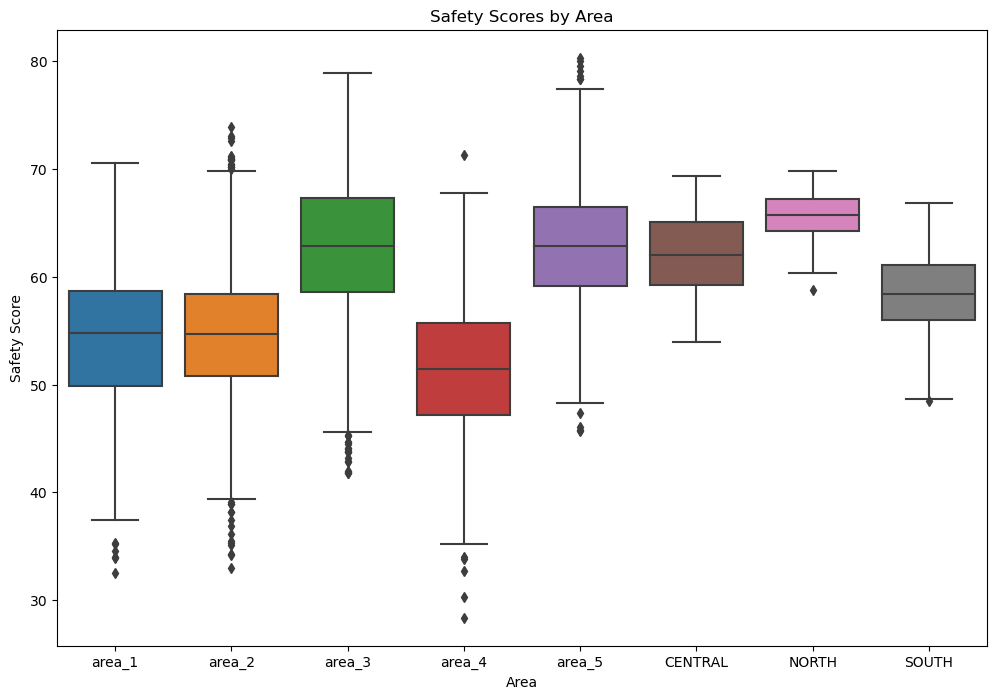

In [ ]:
#definign labels
# mylabels = ['safety', 'trust']

# #plotting the pivot_table with area as index and safety and trust as values
# df_pivot = pd.pivot_table(
# 	df2,
# 	values= mylabels,
# 	index="area",
# 	aggfunc=np.mean
# )

# # Plot a bar chart using the DF
# ax = df_pivot.plot(kind="bar")
# # Get a Matplotlib figure from the axes object for formatting purposes
# fig = ax.get_figure()
# # Change the plot dimensions (width, height)
# fig.set_size_inches(7, 6)
# # Change the axes labels
# ax.set_title('average safety score and trust of people across different areas')
# ax.set_xlabel("Areas")
# ax.set_ylabel("Average Safety and trust Score")

plt.figure(figsize=(12, 8))
sns.boxplot(x='area', y='safety', data=results_df)
plt.title('Safety Scores by Area')
plt.xlabel('Area')
plt.ylabel('Safety Score')
plt.show()

#### Observation:

North of chicago is the safest average people feel in the city. Whereas, area 5 has the most trust on the protection provide by the police.

Area_1 has people concerned with their safety and would prefer trusting police.

Also, area 4 has the least figures obesrved both in terms of police trust and safety for their neighbourhood.

What about different people of various communitites?
Do they feel the exact same way?
What about gender roles?

In [ ]:
results_df["s_sex_female"] = pd.to_numeric(results_df.s_sex_female, errors='coerce')
results_df["s_sex_male"] = pd.to_numeric(results_df.s_sex_male, errors='coerce')
df_gender = results_df[[ 'area',
    's_sex_female',
    's_sex_male',
    'Year'
]].copy()
df_gender.dtypes

area             object
s_sex_female    float64
s_sex_male      float64
Year              int32
dtype: object

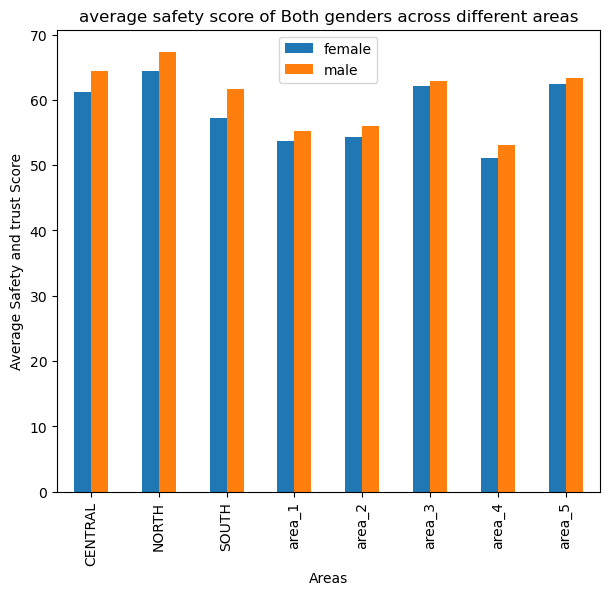

In [ ]:
#definign labels
mylabels = ['s_sex_female', 's_sex_male']

#plotting the pivot_table with area as index and safety and trust as values
df_pivot = pd.pivot_table(
	df_gender,
	values= mylabels,
	index="area",
	aggfunc=np.mean
)

# Plot a bar chart using the DF
ax = df_pivot.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(7, 6)
# Change the axes labels
ax.set_title('average safety score of Both genders across different areas')
ax.set_xlabel("Areas")
ax.set_ylabel("Average Safety and trust Score")
ax.legend(labels = ['female','male'])

It is observed that males feel more secure and reliable on police in all the area.
Also the highest average for female safety is observed in North even though its less than men.
Area 4 still shows a general trend of male and females feeling less secure in the neighbourhood.

#### Different races and their areas wise distribution

Representation of safety scores across different common races

In [ ]:
df_race = results_df[['area','safety', 's_race_african_american',
                        's_race_asian_american','s_race_hispanic','s_race_white']
].copy()

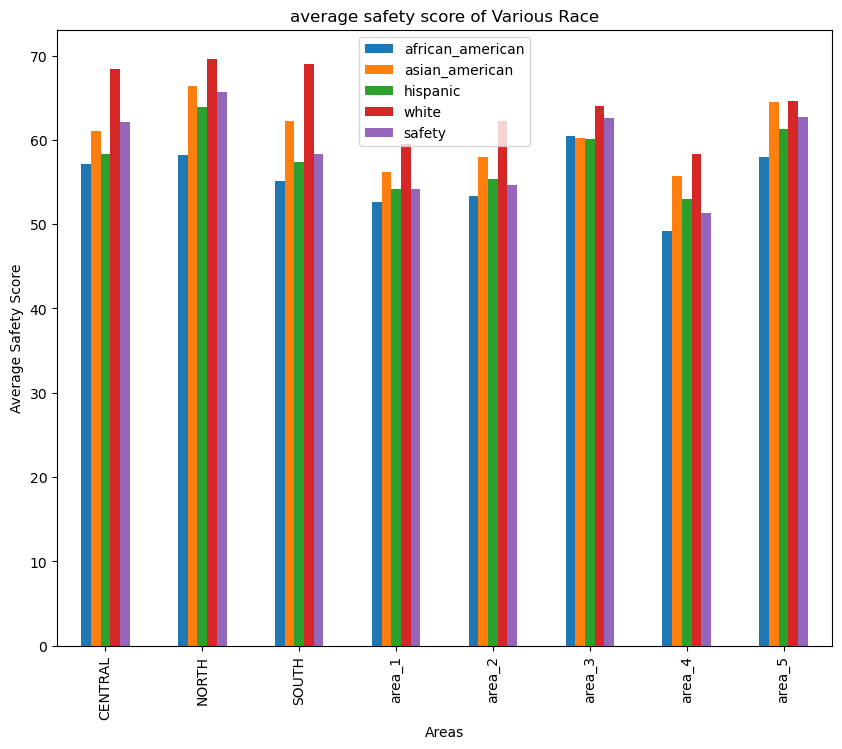

In [ ]:
#definign labels
mylabels = ['safety', 's_race_african_american','s_race_asian_american','s_race_hispanic','s_race_white']

#plotting the pivot_table with area as index and safety and trust as values
df_pivot = pd.pivot_table(
	df_race,
	values= mylabels,
	index="area",
	aggfunc=np.mean
)

# Plot a bar chart using the DF
ax = df_pivot.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(10,8)
# Change the axes labels
ax.set_title('average safety score of Various Race')
ax.set_xlabel("Areas")
ax.set_ylabel("Average Safety Score")
ax.legend(labels = ['african_american','asian_american','hispanic','white','safety'])

#### Different races and their areas wise distribution

Representation of police trust scores across different common races in the area distribution.

In [ ]:
df_trust_race = results_df[['area','trust', 't_race_african_american',
                        't_race_asian_american','t_race_hispanic','t_race_white']
].copy()

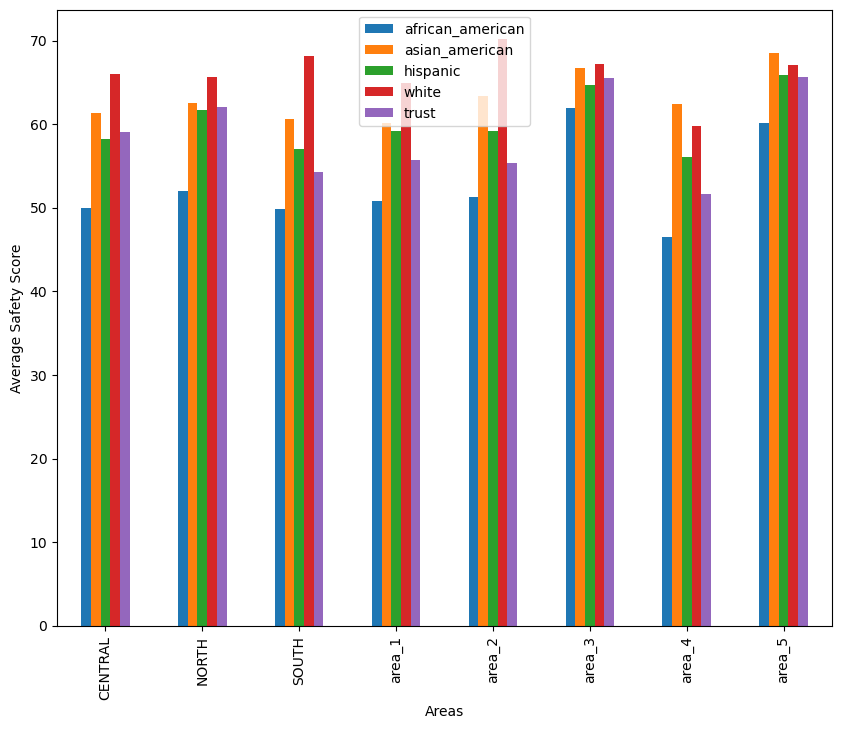

In [ ]:
#definign labels
mylabels = ['trust', 't_race_african_american','t_race_asian_american','t_race_hispanic','t_race_white']

#plotting the pivot_table with area as index and safety and trust as values
df_pivot = pd.pivot_table(
	df_trust_race,
	values= mylabels,
	index="area",
	aggfunc=np.mean
)

# Plot a bar chart using the DF
ax = df_pivot.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(10,8)
# Change the axes labels
ax.set_xlabel("Areas")
ax.set_ylabel("Average Safety Score")
ax.legend(labels = ['african_american','asian_american','hispanic','white','trust'])

#### Different Race and their average scores over the years.

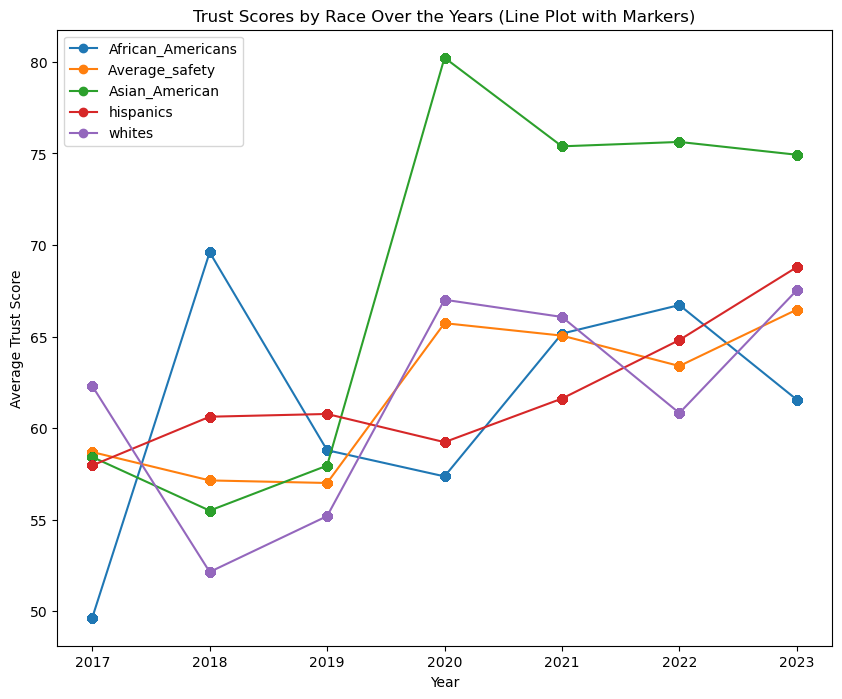

In [ ]:
# safety scores of african american, asian american, whites, hispanic over the years
results_df["safety"] = pd.to_numeric(results_df.safety, errors='coerce')
results_df["s_race_african_american"] = pd.to_numeric(results_df.s_race_african_american, errors='coerce')
results_df["s_race_asian_american"] = pd.to_numeric(results_df.s_race_asian_american, errors='coerce')
results_df["s_race_hispanic"] = pd.to_numeric(results_df.s_race_hispanic, errors='coerce')
results_df["s_race_white"] = pd.to_numeric(results_df.s_race_white, errors='coerce')

# t_race_white
s = pd.DataFrame({
    'African_Americans' : results_df["s_race_african_american"],
    'Average_safety ': results_df['safety'],
    'Asian_American' : results_df["s_race_asian_american"],
    'hispanics' : results_df["s_race_hispanic"],
    'whites': results_df["s_race_white"]
        }, index = results_df['Year'])

# Plot the data using a line plot with markers
ax = s.plot.line(marker='o', figsize=(10, 8))

# Set plot title and labels
plt.title('Trust Scores by Race Over the Years (Line Plot with Markers)')
plt.xlabel('Year')
plt.ylabel('Average Trust Score')

# Show the plot
plt.show()

In [ ]:
results_df["trust"] = pd.to_numeric(results_df.trust, errors='coerce')
results_df["t_race_african_american"] = pd.to_numeric(results_df.t_race_african_american, errors='coerce')
results_df["t_race_asian_american"] = pd.to_numeric(results_df.t_race_asian_american, errors='coerce')
results_df["t_race_hispanic"] = pd.to_numeric(results_df.t_race_hispanic, errors='coerce')
results_df["t_race_white"] = pd.to_numeric(results_df.t_race_white, errors='coerce')

# t_race_white
trust_race = pd.DataFrame({
    'African_Americans'  : results_df["t_race_african_american"],
    'Average_trust ': results_df['trust'],
    'Asian_American' : results_df["t_race_asian_american"],
    'hispanics' : results_df["t_race_hispanic"],
    'whites': results_df["t_race_white"]
        }, index = results_df['Year'])


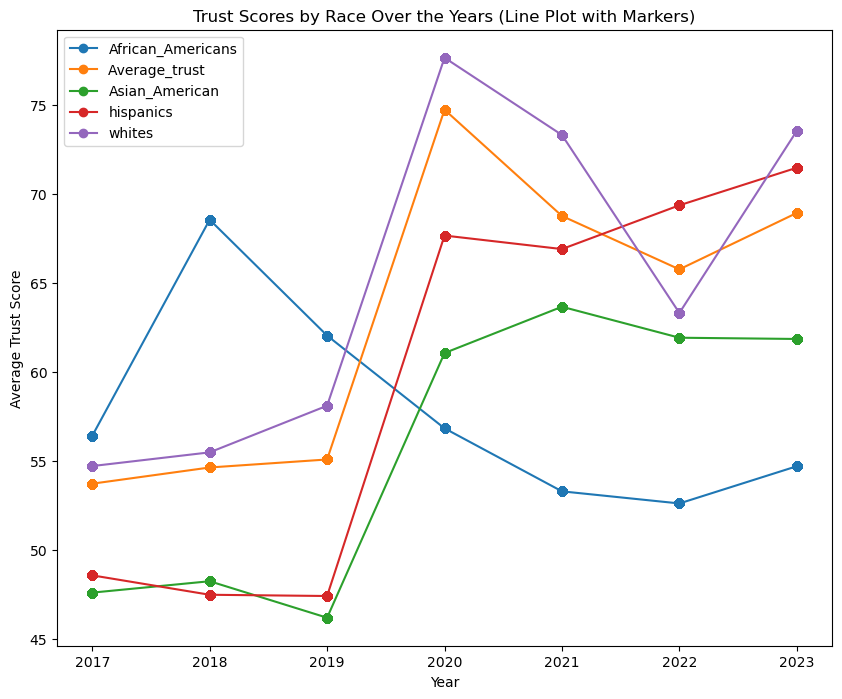

In [ ]:
# Plot the data using a line plot with markers
ax = trust_race.plot.line(marker='o', figsize=(10, 8))

# Set plot title and labels
plt.title('Trust Scores by Race Over the Years (Line Plot with Markers)')
plt.xlabel('Year')
plt.ylabel('Average Trust Score')

# Show the plot
plt.show()

The trust and safety scores of different races have changes over the years in very different
manner.
This could be because of various reasons.
We could further analyze the data in the future and combine it with other available datasets
to get an accurate answer.

### Public Schools Progress Report EDA - Raj Mehta

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data_pth = "Chicago_Public_Schools_Progress_Reports_2023.csv"
df = pd.read_csv(data_pth)


#### Selecting features that are relevant in our case

In [ ]:
features_of_interest = ["Short_Name", "School_Type", "Primary_Category", "Progress_Report_Year",
                        "Creative_School_Certification", "School_Survey_Supportive_Environment",
                        "School_Survey_Safety", "Suspensions_Per_100_Students_Year_2_Pct", "Misconducts_To_Suspensions_Year_2_Pct",
                        "Student_Attendance_Year_2_Pct", "Teacher_Attendance_Year_2_Pct"]

In [ ]:
new_df = df.loc[:,features_of_interest].copy(deep=True)
new_df.head(10)

,Short_Name,School_Type,Primary_Category,Progress_Report_Year,Creative_School_Certification,School_Survey_Supportive_Environment,School_Survey_Safety,Suspensions_Per_100_Students_Year_2_Pct,Misconducts_To_Suspensions_Year_2_Pct,Student_Attendance_Year_2_Pct,Teacher_Attendance_Year_2_Pct
0,RUIZ,Neighborhood,ES,2022,STRONG,NEUTRAL,NEUTRAL,1.3,9.1,88.6,91.2
1,ROOSEVELT HS,Neighborhood,HS,2022,EXCELLING,NEUTRAL,WEAK,4.7,6.9,79.2,92.3
2,LLOYD,Neighborhood,ES,2022,DEVELOPING,NEUTRAL,WEAK,NaN,NaN,89.2,93.7
3,HEDGES,Neighborhood,ES,2022,EXCELLING,NEUTRAL,WEAK,0.6,5.9,88.3,92.5
4,SKINNER NORTH,Classical,ES,2022,EXCELLING,NOT ENOUGH DATA,NOT ENOUGH DATA,0.4,3.2,94.6,92.7
5,KELLOGG,Neighborhood,ES,2022,STRONG,WEAK,NEUTRAL,0.4,20.0,94.2,92.8
6,SHERIDAN,Magnet,ES,2022,EXCELLING,NEUTRAL,WEAK,NaN,NaN,94.6,94.2
7,MITCHELL,Neighborhood,ES,2022,STRONG,NEUTRAL,NEUTRAL,0.3,25.0,92.1,92.2
8,CARROLL,Neighborhood,ES,2022,INCOMPLETE DATA,STRONG,STRONG,12.8,27.8,89.8,92.2
9,ACERO - IDAR,Charter,ES,2022,EXCELLING,NEUTRAL,NEUTRAL,NaN,NaN,93.0,NaN


Now we look at how supportive schools are at various levels (elementary/middle/high) by comparing the proportion of the schools ranked supportive with various levels - VERY WEAK, WEAK, NEUTRAL, STRONG, VERY STRONG

#### EDA 1 - Supportive Environments at Various School Levels

Here we present a bar plot to analyze how supportive schools are at various levels (elementary/middle/high) and whether there are any disparities or changing trends in supportiveness of school staff towards students as they grow older.

c:\Users\rajme\anaconda3\envs\cs418-ds\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


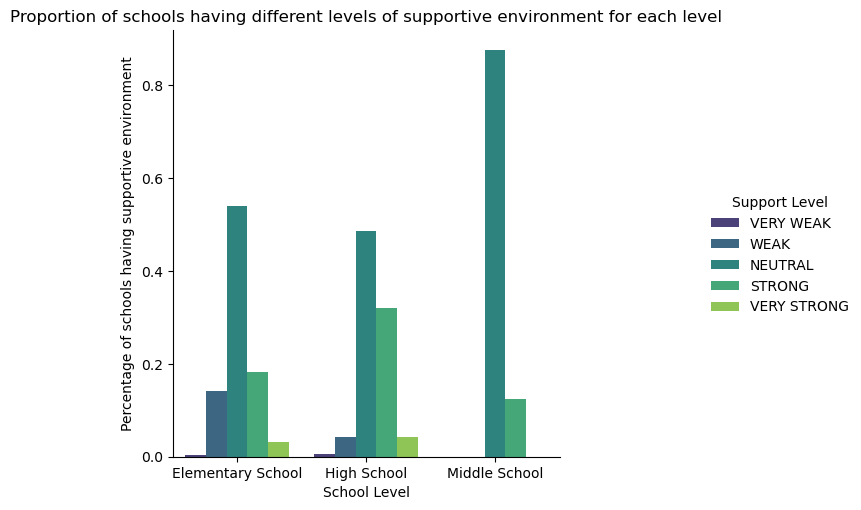

In [ ]:
school_level_df = new_df[["Primary_Category","School_Survey_Supportive_Environment"]].groupby(by="Primary_Category")["School_Survey_Supportive_Environment"].value_counts(normalize=True).reset_index()
school_level_df = school_level_df[school_level_df["School_Survey_Supportive_Environment"] != "NOT ENOUGH DATA"]

hue_order = ['VERY WEAK', 'WEAK', 'NEUTRAL', 'STRONG', 'VERY STRONG']

graph = sns.catplot(data=school_level_df, x="Primary_Category", y="proportion", hue="School_Survey_Supportive_Environment", hue_order=hue_order, kind='bar', palette='viridis')
graph.set_axis_labels("School Level", "Percentage of schools having supportive environment")
graph.legend.set_title("Support Level")
plt.title("Proportion of schools having different levels of supportive environment for each level", loc="center")
plt.xticks(ticks=[0,1,2],labels=["Elementary School", "High School", "Middle School"])

plt.show()

#### Observation

We can see from the above plot that the distribution is similar for elementary and high schools however, it is vastly different for middle schools. However, we cannot draw any strong conclusions from this data since we have 472 elementary schools, 171 high schools, but only 8 middle schools in Chicago. However, we can see that there is no drastic/significant change in the distribution of supportiveness with change in school level.

#### EDA 2 - Student-Teacher Attendance v/s School Safety

Next, we look at how a school's perceived safety affects attendance levels of students and teachers. We expect the attendance to increase as school's perceived safety increases.

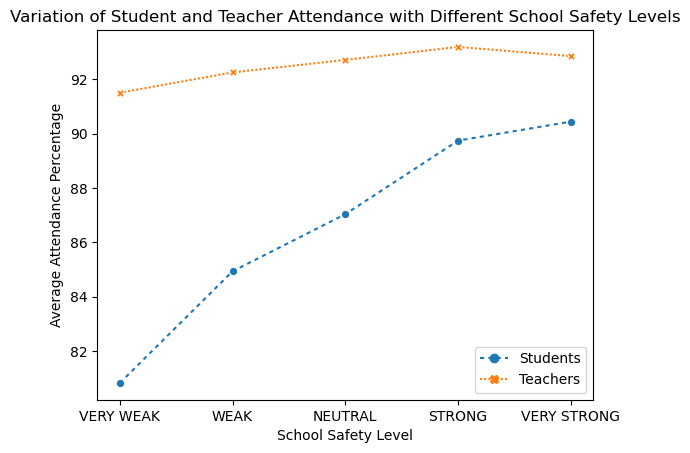

In [ ]:
attendance_df = new_df[["School_Survey_Safety", "Student_Attendance_Year_2_Pct", "Teacher_Attendance_Year_2_Pct"]].groupby(by="School_Survey_Safety").mean()
attendance_df = attendance_df.reset_index().sort_values(by="Student_Attendance_Year_2_Pct")
attendance_df = attendance_df[attendance_df["School_Survey_Safety"] != "NOT ENOUGH DATA"]

attendance_df_melted = pd.melt(attendance_df, id_vars=['School_Survey_Safety'], var_name='Variable', value_name='Value')

graph = sns.lineplot(data=attendance_df_melted, x="School_Survey_Safety", y='Value', hue='Variable', style='Variable', markers=True, dashes={'Student_Attendance_Year_2_Pct': (2, 2), 'Teacher_Attendance_Year_2_Pct': (1, 1)})

legend = plt.legend()

legend.get_texts()[0].set_text('Students')
legend.get_texts()[1].set_text('Teachers')

legend.get_title().set_text("")
plt.xlabel("School Safety Level")
plt.ylabel("Average Attendance Percentage")
plt.title("Variation of Student and Teacher Attendance with Different School Safety Levels")

plt.show()

#### Observation

As hypothesized, we can see that student attendance increases, on average, as the perceived safety of the school increases. Thus, we can conclude that students are more likely to attend schools if it is in a safe neighborhood. This observation will let us explore its correlation with how various neighborhoods in Chicago have different crime rates, and whether poor school quality can lead to worse crime rates in its neighborhoods in the future. 

#### Graph 3 - School Type v/s School Safety

Now we look at how the type of location of the school is correlated with how safe it is. This will help us establish what kind of school locations are safer than others.

c:\Users\rajme\anaconda3\envs\cs418-ds\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


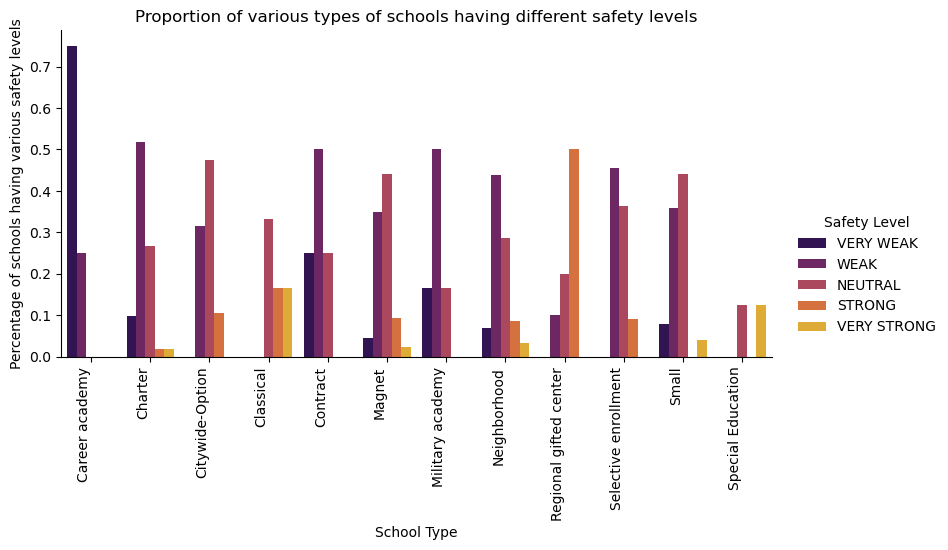

In [ ]:
neighborhood_df = new_df[["School_Type","School_Survey_Safety"]].groupby(by="School_Type")["School_Survey_Safety"].value_counts(normalize=True).reset_index()
neighborhood_df = neighborhood_df[neighborhood_df["School_Survey_Safety"] != "NOT ENOUGH DATA"]

hue_order = ['VERY WEAK', 'WEAK', 'NEUTRAL', 'STRONG', 'VERY STRONG']

graph = sns.catplot(data=neighborhood_df, x="School_Type", y="proportion", hue="School_Survey_Safety", hue_order=hue_order, kind='bar', palette='inferno', height=4, aspect=2)
graph.set_axis_labels("School Type", "Percentage of schools having various safety levels")
graph.legend.set_title("Safety Level")
graph.set_xticklabels(rotation=90, ha='right')
plt.title("Proportion of various types of schools having different safety levels", loc="center")


plt.show()

#### Observation

From the above bar chart, we can identify school types that are quite safe - Classical, Regional gifted center, and special education; school types are safe on the average - Citywide-option. Magnet, Neighborhood, Small, and Selective enrollment; and school types that are less safe on the average - Career academy, Charter, Contract, and Military academy. These demarcations are intriguing and would be interesting to see how this correlates with various neighborhoods in Chicago and their crime rates.

### Analyzing the effects of alcohol establishments affect crime in the area - Rohan Sai Buddhi

#### Library loading

Does the presence of businesses related to alcohol and tobacco cause more crimes in surrounding areas?

In [ ]:
pip install sodapy

In [ ]:
import pandas as pd
from sodapy import Socrata
import numpy as np
import matplotlib.pyplot as plt


#### Loading Data

In [ ]:
#connect to the data portal using app token
client = Socrata("data.cityofchicago.org", "170ywTMm01BE37S2mmzT8QK7h")

In [ ]:
#get corresponding dataset with the dataset identifer, limit 55k since dataset has 54986 values
results = client.get("uupf-x98q", limit = 55000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [ ]:
np.shape(results_df)

(55000, 33)

In [ ]:
results_df.columns

Index(['license_description', 'zip_code', 'license_id', 'location',
       'date_issued', 'city', 'ward_precinct', 'address', 'license_status',
       'conditional_approval', 'state', 'payment_date', 'business_activity',
       'license_start_date', 'ssa', 'latitude', 'precinct',
       'application_requirements_complete', 'ward', 'doing_business_as_name',
       'police_district', 'business_activity_id', 'longitude',
       'application_type', 'license_number', 'license_approved_for_issuance',
       'expiration_date', 'account_number', 'site_number', 'license_code',
       'legal_name', 'id', 'application_created_date'],
      dtype='object')

In [ ]:
#We can see that there are multiple descriptions for alcohol serving businesses.
#the types of liquor licenses can be found here https://www.chicago.gov/city/en/depts/bacp/supp_info/classes_of_liquorlicenses.html
results_df["license_description"].value_counts()

Limited Business License                               17403
Retail Food Establishment                              11209
Regulated Business License                              8213
Consumption on Premises - Incidental Activity           2802
Tobacco                                                 1984
Motor Vehicle Services License                          1500
Peddler License                                         1220
Package Goods                                           1154
Children's Services Facility License                     846
Tavern                                                   816
Public Place of Amusement                                811
Manufacturing Establishments                             738
Outdoor Patio                                            719
Pharmaceutical Representative                            674
Shared Kitchen User (Long Term)                          604
Commercial Garage                                        577
Wholesale Food Establish

#### Filtering Data

We only want data which relates to alcohol and tobacco, so we filter it out before cleaning relevant columns.

In [ ]:
#packaged goods license can be used by groceries too, so we are not including that.
alcohol_related_descriptions = [
    "Caterer's Liquor License",
    "Consumption on Premises - Incidental Activity",
    "Tavern",
    "Late Hour",
    "Special Event Liquor",
    "Late Hour",
    "Outdoor Patio"
]

In [ ]:
# Filter the DataFrame based on the provided list of descriptions
alcohol_business_df = results_df[results_df['license_description'].isin(alcohol_related_descriptions)]

# Display the filtered DataFrame
alcohol_business_df.shape

(4730, 33)

In [ ]:
alcohol_business_df["license_description"].value_counts()

Consumption on Premises - Incidental Activity    2802
Tavern                                            816
Outdoor Patio                                     719
Caterer's Liquor License                          263
Late Hour                                         128
Special Event Liquor                                2
Name: license_description, dtype: int64

#### Cleaning data

we mainly care about the location of these stores, so let's make sure we dont have null values for lat and long

In [ ]:
alcohol_business_df["latitude"]

38       41.980469496
48       41.867452731
51       41.930956922
53       41.943316391
57       41.968541249
             ...     
54927    41.940090125
54929    41.919952357
54935    41.917143721
54946    41.922453372
54996    41.846944869
Name: latitude, Length: 4730, dtype: object

In [ ]:
alcohol_business_df["latitude"].isna().any()

True

In [ ]:
alcohol_business_df["longitude"].isna().any()

True

Since we have null values in both, let us get rid of the null lat and long so we can visualize the data

In [ ]:
lat_long_mask = alcohol_business_df['latitude'].notna() & alcohol_business_df['longitude'].notna()
filtered_df = alcohol_business_df[lat_long_mask]

In [ ]:
filtered_df

,license_description,zip_code,license_id,location,date_issued,city,ward_precinct,address,license_status,conditional_approval,...,application_type,license_number,license_approved_for_issuance,expiration_date,account_number,site_number,license_code,legal_name,id,application_created_date
38,Tavern,60630,2935353,"{'latitude': '41.98046949592434', 'human_addre...",2023-10-24T00:00:00.000,CHICAGO,45-40,5485 N NORTHWEST HWY,AAI,N,...,RENEW,45629,2023-10-23T00:00:00.000,2025-12-15T00:00:00.000,10787,1,1470,"TRUST ME & CO., INC",45629-20231216,NaN
48,Consumption on Premises - Incidental Activity,60605,2937935,"{'latitude': '41.86745273087616', 'human_addre...",2023-11-02T00:00:00.000,CHICAGO,34-,150 W ROOSEVELT RD A101,AAI,N,...,RENEW,2812689,2023-10-16T00:00:00.000,2025-10-15T00:00:00.000,479191,1,1475,"THE X POT CHICAGO, LLC.",2812689-20231216,NaN
51,Consumption on Premises - Incidental Activity,60647,2936746,"{'latitude': '41.93095692249829', 'human_addre...",2023-10-17T00:00:00.000,CHICAGO,35-39,2717 N MAPLEWOOD AVE 1,AAI,N,...,RENEW,2543409,2023-10-16T00:00:00.000,2025-12-15T00:00:00.000,395664,1,1475,"MERCENARY BREWERY & DISTILLERY, LLC",2543409-20231216,NaN
53,Consumption on Premises - Incidental Activity,60618,2937541,"{'latitude': '41.943316391093994', 'human_addr...",2023-10-17T00:00:00.000,CHICAGO,32-21,2022 W ROSCOE ST LL-1,AAI,N,...,RENEW,2689716,2023-10-16T00:00:00.000,2025-12-15T00:00:00.000,462417,1,1475,ROSCOE SAME LLC,2689716-20231216,NaN
57,Consumption on Premises - Incidental Activity,60625,2937483,"{'latitude': '41.96854124925287', 'human_addre...",2023-10-24T00:00:00.000,CHICAGO,33-2,3254 W LAWRENCE AVE,AAI,N,...,RENEW,2684321,2023-10-23T00:00:00.000,2025-12-15T00:00:00.000,461309,1,1475,"3254 WEST LAWRENCE, INC.",2684321-20231216,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54927,Consumption on Premises - Incidental Activity,60657,2811689,"{'latitude': '41.94009012484825', 'human_addre...",2021-10-13T00:00:00.000,CHICAGO,44-42,800 W BELMONT AVE 1,AAI,N,...,RENEW,2551073,2021-10-12T00:00:00.000,2023-11-15T00:00:00.000,420491,1,1475,FURIOUS SPOON LAKEVIEW LLC,2551073-20211116,NaN
54929,Tavern,60647,2809534,"{'latitude': '41.919952357067444', 'human_addr...",2021-11-12T00:00:00.000,CHICAGO,32-29,2076 N HOYNE AVE,AAI,N,...,RENEW,7537,2021-11-11T00:00:00.000,2023-11-15T00:00:00.000,25651,1,1470,CHARLESTON INC,7537-20211116,NaN
54935,Tavern,60647,2810283,"{'latitude': '41.91714372056658', 'human_addre...",2021-11-03T00:00:00.000,CHICAGO,26-15,3659 W ARMITAGE AVE,AAI,N,...,RENEW,1488903,2021-11-02T00:00:00.000,2023-11-15T00:00:00.000,274900,1,1470,"CHRIS' PLACE, INC.",1488903-20211116,NaN
54946,Consumption on Premises - Incidental Activity,60647,2810340,"{'latitude': '41.92245337159381', 'human_addre...",2021-11-05T00:00:00.000,CHICAGO,1-13,2286-2294 N MILWAUKEE AVE 1ST,AAI,N,...,RENEW,2443009,2021-11-04T00:00:00.000,2023-11-15T00:00:00.000,284344,2,1475,"COZY CORNER DINER AND PANCAKE HOUSE, INC",2443009-20211116,NaN


In [ ]:
print(filtered_df["latitude"].isna().any() or filtered_df["longitude"].isna().any())

False


We can see that we have removed all the businesses with null values in the latitude and longitude columns and we went from 4729 to 4680, so only 49 null values which is not bad
Now let us also check the type of the values in the columns latitude and longitude since they are normally float values

In [ ]:
filtered_df["longitude"].dtype

dtype('O')

Type '0' means that the column is currently of mixed type, we can assume latitude might also be mixed, so we can convert both to float so that we can plot them easily.

In [ ]:
filtered_df['longitude'] = filtered_df['longitude'].astype(float)
filtered_df['latitude'] = filtered_df['latitude'].astype(float)

<ipython-input-19-779a358f8f48>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['longitude'] = filtered_df['longitude'].astype(float)
<ipython-input-19-779a358f8f48>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['latitude'] = filtered_df['latitude'].astype(float)


#### Analysing data at hand

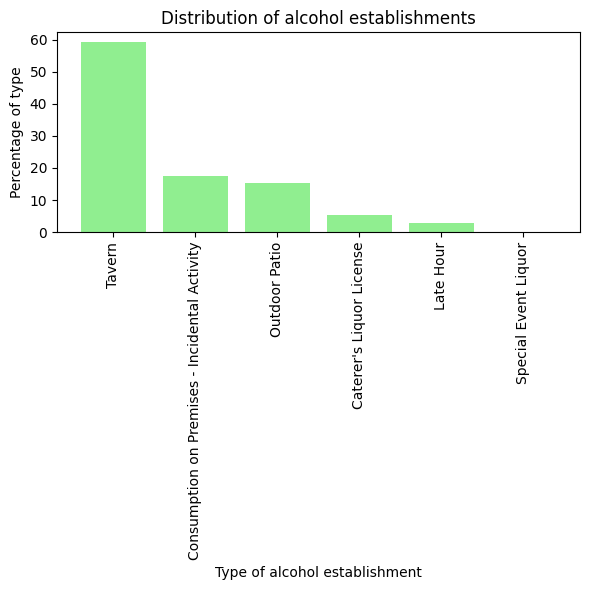

In [ ]:
plt.figure(figsize=(6, 6))
plt.bar(filtered_df['license_description'].unique(), (filtered_df['license_description'].value_counts())*100/filtered_df['license_description'].value_counts().sum(), color='lightgreen')
plt.xlabel('Type of alcohol establishment')
plt.ylabel('Percentage of type')
plt.title('Distribution of alcohol establishments')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

This visualisation is to help understand what the most prevalent type of alcohol establishment is. Clearly Consumption on Premises is the most prevalent, which might lead to people too drunk near these premises causing issues in the neighbourhood.

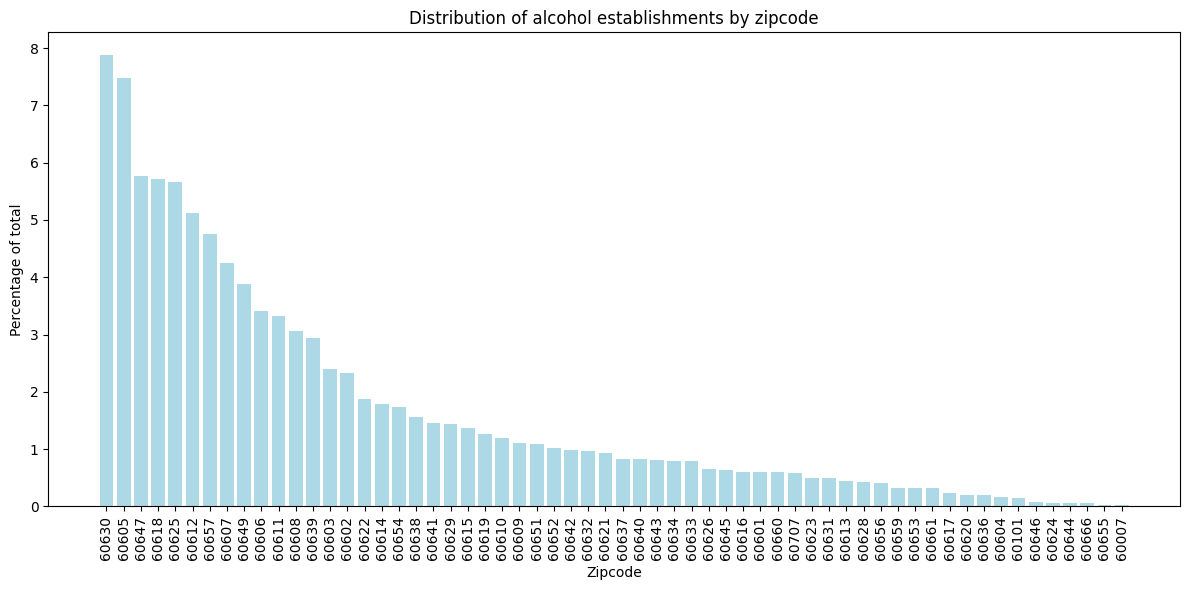

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(filtered_df['zip_code'].unique(), (filtered_df['zip_code'].value_counts())*100/filtered_df['zip_code'].value_counts().sum(), color='lightblue')
plt.xlabel('Zipcode')
plt.ylabel('Percentage of total')
plt.title('Distribution of alcohol establishments by zipcode')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

This visualisation is to see which zipcodes have how many alcohol establishments, and down the line, we intend to see the crimes in these districts and if they might be directly related to the number of alcohol establishments in the area.

#### Plotting geospatial data

In [ ]:
!pip install plotly

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
fig = px.scatter_mapbox(
    filtered_df,
    lat="latitude",
    lon="longitude",
    hover_name="license_description",
    zoom=10
)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(
    margin={"r": 0, "t": 0, "l": 0, "b": 0},
)
fig.show()

A plot of all the alcohol establoshments in Chicago, plotted on the map. We can clearly see a few streets having more clustered establishments. We will try to zero-in on these streets and see how crime might be spatially related to this data

#### Clustering the data points

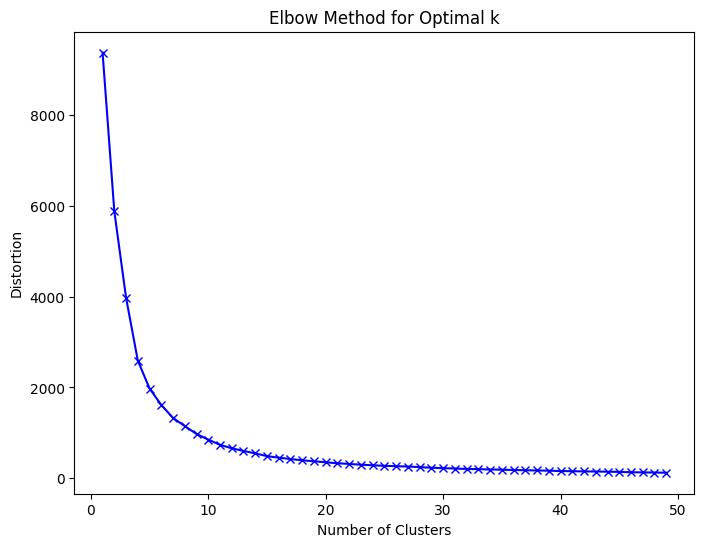

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Extract latitude and longitude
lat_lon_data = filtered_df[['latitude', 'longitude']]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(lat_lon_data)

# Determine the optimal number of clusters (k) using the Elbow Method
distortions = []
K = range(1, 50)
for k in K:
    kmeans = KMeans(n_clusters=k, n_init = 10, random_state=0)
    kmeans.fit(scaled_data)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal k')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

<ipython-input-26-16fb8e04ef0e>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



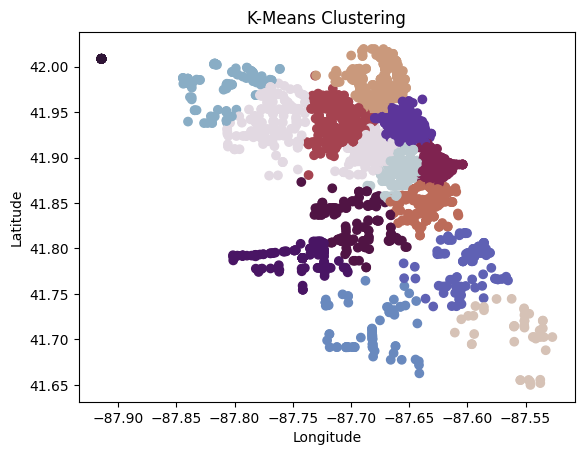

In [ ]:
# Let us choose an appropriate k based on the plot, k = 10 since that is the elbow

# Fit the K-Means model with the selected k
k = 15
kmeans = KMeans(n_clusters=k, random_state=0)
filtered_df['cluster'] = kmeans.fit_predict(scaled_data)

# Visualize clusters on a scatter plot
plt.scatter(filtered_df['longitude'], filtered_df['latitude'], c=filtered_df['cluster'], cmap='twilight')
plt.title('K-Means Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

A clustering of the alcohol establishments to futher use in spatial correlation analysis. This will help us see if the crimes in these clusters correlate to the location and frequency of the alcohol establishments!

#### Loading crime data of 2022

In [ ]:
results = client.get("9hwr-2zxp", limit = 239000, where = "date between '2022-12-01T00:00:00' and '2022-12-31T00:00:00'")
# Convert to pandas DataFrame

In [ ]:
crime_df = pd.DataFrame.from_records(results)

In [ ]:
crime_df["date"].value_counts

<bound method IndexOpsMixin.value_counts of 0        2022-12-31T00:00:00.000
1        2022-12-31T00:00:00.000
2        2022-12-31T00:00:00.000
3        2022-12-31T00:00:00.000
4        2022-12-31T00:00:00.000
                  ...           
19206    2022-12-01T00:00:00.000
19207    2022-12-01T00:00:00.000
19208    2022-12-01T00:00:00.000
19209    2022-12-01T00:00:00.000
19210    2022-12-01T00:00:00.000
Name: date, Length: 19211, dtype: object>

In [ ]:
crime_df.head()

,date,district,block,description,location_description,updated_on,community_area,iucr,ward,case_number,...,fbi_code,beat,primary_type,arrest,id,location,y_coordinate,latitude,x_coordinate,longitude
0,2022-12-31T00:00:00.000,008,064XX S KILPATRICK AVE,TELEPHONE THREAT,RESIDENCE,2023-01-23T15:42:15.000,64,2820,13,JG125567,...,08A,0813,OTHER OFFENSE,False,12960359,NaN,NaN,NaN,NaN,NaN
1,2022-12-31T00:00:00.000,006,091XX S PRINCETON AVE,VIOLATE ORDER OF PROTECTION,APARTMENT,2023-01-24T15:42:46.000,49,4387,21,JG126529,...,26,0634,OTHER OFFENSE,False,12961793,NaN,NaN,NaN,NaN,NaN
2,2022-12-31T00:00:00.000,025,051XX W WABANSIA AVE,FORGERY,OTHER (SPECIFY),2023-02-26T15:41:59.000,25,1120,37,JG165434,...,10,2533,DECEPTIVE PRACTICE,False,12993418,NaN,NaN,NaN,NaN,NaN
3,2022-12-31T00:00:00.000,002,013XX E 49TH ST,TO VEHICLE,STREET,2023-01-07T15:41:08.000,39,1320,4,JF528298,...,14,0222,CRIMINAL DAMAGE,False,12937541,"{'latitude': '41.806045832', 'human_address': ...",1872783,41.806045832,1186111,-87.592932479
4,2022-12-31T00:00:00.000,020,059XX N RAVENSWOOD AVE,$500 AND UNDER,APARTMENT,2023-01-07T15:41:08.000,77,0820,40,JF528599,...,06,2012,THEFT,False,12937733,"{'latitude': '41.989658338', 'human_address': ...",1939510,41.989658338,1163311,-87.674675502


In [ ]:
crime_df.shape

(19211, 22)

let us check for null values in the latitude and longitude columns of the crime data

In [ ]:
crime_df["latitude"].isna().any()

True

In [ ]:
crime_df["longitude"].isna().any()

True

Since both have null values, let us remove them and then convert them to a geo dataframe for further analysis.

In [ ]:
lat_long_mask = crime_df['latitude'].notna() & crime_df['longitude'].notna()
crime_df = crime_df[lat_long_mask]
crime_df.isna().any()

date                    False
district                False
block                   False
description             False
location_description     True
updated_on              False
community_area          False
iucr                    False
ward                    False
case_number             False
year                    False
domestic                False
fbi_code                False
beat                    False
primary_type            False
arrest                  False
id                      False
location                False
y_coordinate            False
latitude                False
x_coordinate            False
longitude               False
dtype: bool

we see that latitude and longitude have no more null values. now let us convert them into geo dataframe

convert lat and long to float

In [ ]:
crime_df.latitude = crime_df.latitude.astype('float')
crime_df.longitude = crime_df.longitude.astype('float')

In [ ]:
!pip install pysal

In [ ]:
!pip install libpysal

In [ ]:
!pip install contextily

In [ ]:
import geopandas as gpd
from shapely.geometry import Point
from libpysal.weights import Queen
from esda.moran import Moran
import statsmodels.api as sm
from libpysal.weights import WSP
import contextily as ctx

In [ ]:
# Create GeoDataFrames from Pandas DataFrames
crime = gpd.GeoDataFrame(crime_df,
                         crs = "EPSG:4326",
                         geometry = gpd.points_from_xy(crime_df.longitude, crime_df.latitude))
alcohol = gpd.GeoDataFrame(filtered_df,
                         crs = "EPSG:4326",
                         geometry = gpd.points_from_xy(filtered_df.longitude, filtered_df.latitude))

In [ ]:
#chicago is lat 41.868 and long -87.665, so let us look within that

In [ ]:
crime = crime[(crime["longitude"] > -88) & (crime["latitude"] < 42)]

/usr/local/lib/python3.10/dist-packages/contextily/tile.py:614: UserWarning:

The inferred zoom level of 28 is not valid for the current tile provider (valid zooms: 0 - 20).



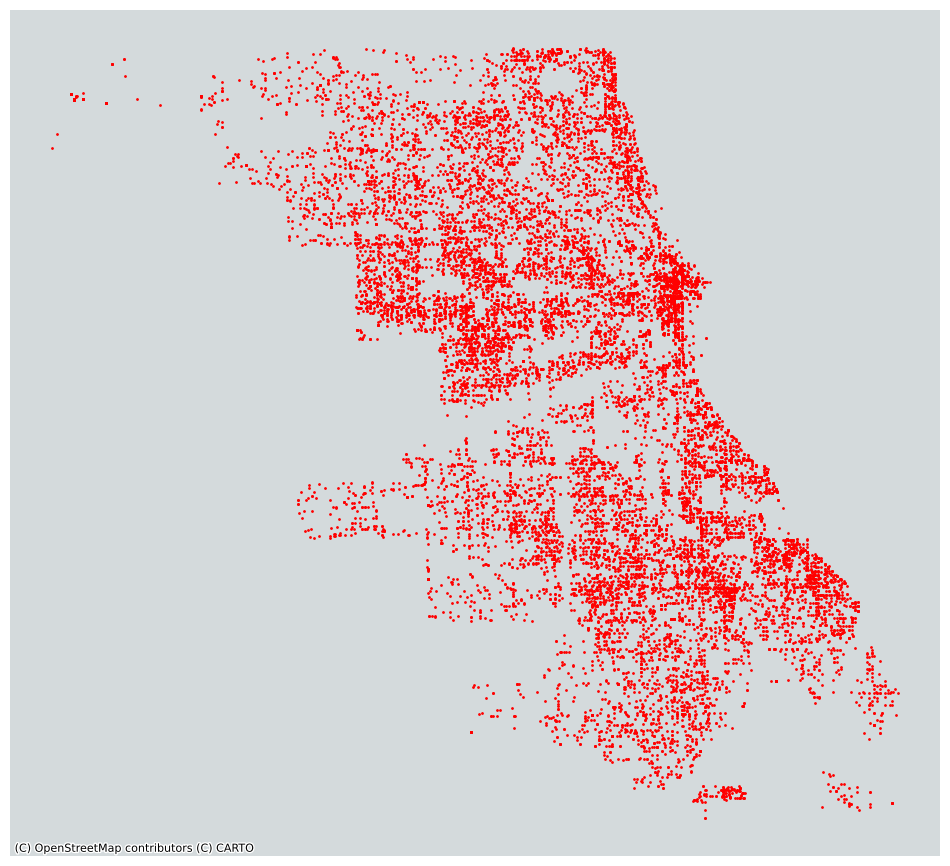

In [ ]:
fig,ax = plt.subplots(figsize=(12,12))

crime.plot(ax=ax,
             color='red',
             markersize=1)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

#### Clustering the crime occurencces

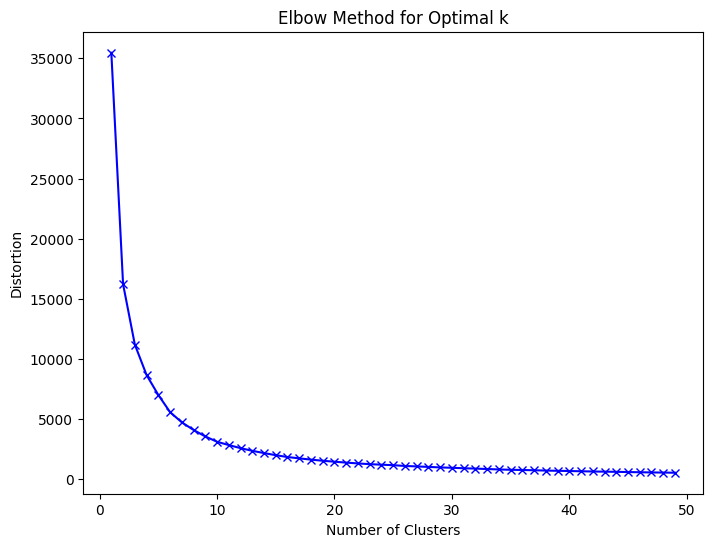

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Extract latitude and longitude
lat_lon_data = crime_df[['latitude', 'longitude']]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(lat_lon_data)

# Determine the optimal number of clusters (k) using the Elbow Method
distortions = []
K = range(1, 50)
for k in K:
    kmeans = KMeans(n_clusters=k, n_init = 10, random_state=0)
    kmeans.fit(scaled_data)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal k')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



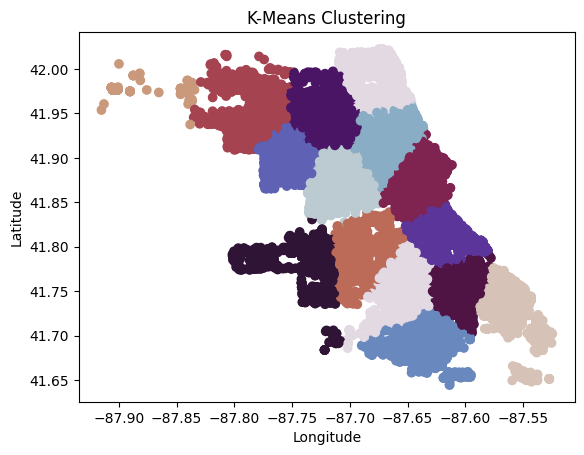

In [ ]:
# Let us choose an appropriate k based on the plot, k = 10 since that is the elbow

# Fit the K-Means model with the selected k
k = 15
kmeans = KMeans(n_clusters=k, random_state=0)
crime_df['cluster'] = kmeans.fit_predict(scaled_data)

# Visualize clusters on a scatter plot
plt.scatter(crime_df['longitude'], crime_df['latitude'], c=crime_df['cluster'], cmap='twilight')
plt.title('K-Means Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [ ]:
!pip install Sodapy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sodapy import Socrata

In [ ]:
#connect to the data portal using app token
client = Socrata("data.cityofchicago.org", "170ywTMm01BE37S2mmzT8QK7h")
results = client.get("9hwr-2zxp", limit = 239000, where = "date between '2022-01-01T00:00:00' and '2022-12-31T00:00:00'")


In [ ]:
crime_2022 = pd.DataFrame.from_records(results)
crime_2022.head()

,date,location,district,block,y_coordinate,latitude,description,location_description,updated_on,community_area,...,ward,case_number,year,domestic,fbi_code,longitude,beat,primary_type,arrest,id
0,2022-12-31T00:00:00.000,"{'latitude': '41.772483306', 'human_address': ...",003,067XX S CLYDE AVE,1860598,41.772483306,ATTEMPT - AUTOMOBILE,STREET,2023-01-07T15:41:08.000,43,...,5,JF528887,2022,False,07,-87.574021091,0331,MOTOR VEHICLE THEFT,False,12937957
1,2022-12-31T00:00:00.000,NaN,008,064XX S KILPATRICK AVE,NaN,NaN,TELEPHONE THREAT,RESIDENCE,2023-01-23T15:42:15.000,64,...,13,JG125567,2022,True,08A,NaN,0813,OTHER OFFENSE,False,12960359
2,2022-12-31T00:00:00.000,NaN,008,045XX W 63RD ST,NaN,NaN,TO PROPERTY,OTHER (SPECIFY),2023-01-07T15:41:08.000,65,...,13,JG102918,2022,False,14,NaN,0813,CRIMINAL DAMAGE,False,12940881
3,2022-12-31T00:00:00.000,"{'latitude': '41.945361694', 'human_address': ...",019,010XX W CORNELIA AVE,1923408,41.945361694,TO VEHICLE,ALLEY,2023-01-07T15:41:08.000,6,...,44,JF528636,2022,False,26,-87.655862929,1924,CRIMINAL TRESPASS,False,12938180
4,2022-12-31T00:00:00.000,"{'latitude': '41.766735948', 'human_address': ...",003,070XX S INDIANA AVE,1858396,41.766735948,RECKLESS FIREARM DISCHARGE,SIDEWALK,2023-01-07T15:41:08.000,69,...,6,JF528206,2022,False,15,-87.620143612,0322,WEAPONS VIOLATION,False,12937396


In [ ]:
crime_2022.shape

(238344, 22)

In [ ]:
crime_2022.columns

Index(['date', 'location', 'district', 'block', 'y_coordinate', 'latitude',
       'description', 'location_description', 'updated_on', 'community_area',
       'iucr', 'x_coordinate', 'ward', 'case_number', 'year', 'domestic',
       'fbi_code', 'longitude', 'beat', 'primary_type', 'arrest', 'id'],
      dtype='object')

In [ ]:
crime_2022["primary_type"].value_counts()

THEFT                                54744
BATTERY                              40802
CRIMINAL DAMAGE                      27121
MOTOR VEHICLE THEFT                  21366
ASSAULT                              20743
DECEPTIVE PRACTICE                   16485
OTHER OFFENSE                        14539
ROBBERY                               8939
WEAPONS VIOLATION                     8718
BURGLARY                              7574
NARCOTICS                             4725
CRIMINAL TRESPASS                     4212
OFFENSE INVOLVING CHILDREN            1861
CRIMINAL SEXUAL ASSAULT               1558
SEX OFFENSE                           1211
HOMICIDE                               724
PUBLIC PEACE VIOLATION                 710
STALKING                               446
ARSON                                  419
INTERFERENCE WITH PUBLIC OFFICER       393
PROSTITUTION                           283
LIQUOR LAW VIOLATION                   202
INTIMIDATION                           184
CONCEALED C

In [ ]:
#select relevvant columns
crime_filtered_df = pd.DataFrame(crime_2022[["latitude", "longitude", "primary_type", "location_description"]])
#get date and time separately
crime_filtered_df["date"] = pd.to_datetime(crime_2022['date']).dt.date
crime_filtered_df['Time'] = pd.to_datetime(crime_2022['date']).dt.time
#drop NA in all columns and convert lat and long to float
crime_filtered_df = crime_filtered_df.dropna()
crime_filtered_df.loc["latitude"] = crime_filtered_df["latitude"].astype('float')
crime_filtered_df.loc["longitude"] = crime_filtered_df["longitude"].astype('float')

In [ ]:
crime_filtered_df.head()

,latitude,longitude,primary_type,location_description,date,Time
0,41.772483306,-87.574021091,MOTOR VEHICLE THEFT,STREET,2022-12-31,00:00:00
3,41.945361694,-87.655862929,CRIMINAL TRESPASS,ALLEY,2022-12-31,00:00:00
4,41.766735948,-87.620143612,WEAPONS VIOLATION,SIDEWALK,2022-12-31,00:00:00
5,41.751305337,-87.603628907,CRIMINAL TRESPASS,GAS STATION,2022-12-31,00:00:00
6,41.765185248,-87.570144721,CRIMINAL DAMAGE,STREET,2022-12-31,00:00:00


In [ ]:
crime_filtered_df["primary_type"].value_counts()

THEFT                                53087
BATTERY                              40581
CRIMINAL DAMAGE                      26823
MOTOR VEHICLE THEFT                  21189
ASSAULT                              20644
OTHER OFFENSE                        14196
DECEPTIVE PRACTICE                   14180
ROBBERY                               8919
WEAPONS VIOLATION                     8642
BURGLARY                              7497
CRIMINAL TRESPASS                     4179
NARCOTICS                             3961
OFFENSE INVOLVING CHILDREN            1763
CRIMINAL SEXUAL ASSAULT               1471
SEX OFFENSE                           1127
HOMICIDE                               724
PUBLIC PEACE VIOLATION                 703
STALKING                               419
ARSON                                  417
INTERFERENCE WITH PUBLIC OFFICER       391
PROSTITUTION                           283
LIQUOR LAW VIOLATION                   200
CONCEALED CARRY LICENSE VIOLATION      177
INTIMIDATIO

In [ ]:
# Set a seed for reproducibility
seed = 42

# Define the column to use for stratified sampling
strata_column = 'primary_type'

# Perform stratified sampling
stratified_sample = crime_filtered_df.groupby(strata_column, group_keys=False).apply(lambda x: x.sample(min(len(x), 5000), random_state=seed))

In [ ]:
# Display the stratified sample
stratified_sample["primary_type"].value_counts()

WEAPONS VIOLATION                    5000
ROBBERY                              5000
BATTERY                              5000
BURGLARY                             5000
THEFT                                5000
CRIMINAL DAMAGE                      5000
MOTOR VEHICLE THEFT                  5000
DECEPTIVE PRACTICE                   5000
ASSAULT                              5000
OTHER OFFENSE                        5000
CRIMINAL TRESPASS                    4179
NARCOTICS                            3961
OFFENSE INVOLVING CHILDREN           1763
CRIMINAL SEXUAL ASSAULT              1471
SEX OFFENSE                          1127
HOMICIDE                              724
PUBLIC PEACE VIOLATION                703
STALKING                              419
ARSON                                 417
INTERFERENCE WITH PUBLIC OFFICER      391
PROSTITUTION                          283
LIQUOR LAW VIOLATION                  200
CONCEALED CARRY LICENSE VIOLATION     177
INTIMIDATION                      

In [ ]:
# Get the value counts for the 'primary_type' column
value_counts = stratified_sample['primary_type'].value_counts()

# Identify primary types with 5000 occurrences
primary_types_to_keep = value_counts[value_counts == 5000].index

# Filter the DataFrame based on the identified primary types
filtered_stratified_sample = stratified_sample[stratified_sample['primary_type'].isin(primary_types_to_keep)]

In [ ]:
filtered_stratified_sample["primary_type"].value_counts()

ASSAULT                5000
BATTERY                5000
BURGLARY               5000
CRIMINAL DAMAGE        5000
DECEPTIVE PRACTICE     5000
MOTOR VEHICLE THEFT    5000
OTHER OFFENSE          5000
ROBBERY                5000
THEFT                  5000
WEAPONS VIOLATION      5000
Name: primary_type, dtype: int64

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
# Select relevant columns
df = stratified_sample[['latitude', 'longitude', 'location_description','Time','primary_type']]
df['Time'] = df['Time'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second).astype(float)
#convert columns to label encodings
label_encoder = LabelEncoder()
df['location_description'] = label_encoder.fit_transform(df['location_description'])
df['primary_type'] = label_encoder.fit_transform(df['primary_type'])


<ipython-input-91-d7113425707b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time'] = df['Time'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second).astype(float)
<ipython-input-91-d7113425707b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location_description'] = label_encoder.fit_transform(df['location_description'])
<ipython-input-91-d7113425707b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [ ]:
#split into x and y
X = df[['latitude', 'longitude', 'location_description','Time']]
y = df[["primary_type"]]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train["Time"].dtype

dtype('float64')

In [ ]:
#normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#simple dnn with one hidden layer
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')

Epoch 1/20
662/662 [==============================] - 8s 11ms/step - loss: 2.6983 - accuracy: 0.1560 - val_loss: 2.6145 - val_accuracy: 0.1726
Epoch 2/20
662/662 [==============================] - 5s 8ms/step - loss: 2.6100 - accuracy: 0.1775 - val_loss: 2.5771 - val_accuracy: 0.1926
Epoch 3/20
662/662 [==============================] - 7s 10ms/step - loss: 2.5798 - accuracy: 0.1862 - val_loss: 2.5529 - val_accuracy: 0.1916
Epoch 4/20
662/662 [==============================] - 6s 9ms/step - loss: 2.5557 - accuracy: 0.1979 - val_loss: 2.5322 - val_accuracy: 0.2025
Epoch 5/20
662/662 [==============================] - 5s 8ms/step - loss: 2.5319 - accuracy: 0.2027 - val_loss: 2.5126 - val_accuracy: 0.2042
Epoch 6/20
662/662 [==============================] - 7s 10ms/step - loss: 2.5131 - accuracy: 0.2098 - val_loss: 2.4884 - val_accuracy: 0.2161
Epoch 7/20
662/662 [==============================] - 5s 8ms/step - loss: 2.4932 - accuracy: 0.2155 - val_loss: 2.4927 - val_accuracy: 0.2146
Epo

In [ ]:
print()

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
# Establish a baseline with a Dummy Classifier
dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(X_train, y_train)

# Predict on the test set
baseline_predictions = dummy_classifier.predict(X_test)
print(baseline_predictions)
# Calculate the accuracy of the baseline model
baseline_accuracy = accuracy_score(y_test, baseline_predictions)
print(f'Baseline Accuracy: {baseline_accuracy}')

[30 30 30 ... 30 30 30]
Baseline Accuracy: 0.07365717307547028


The baseline comparison just predicts the target as the most frequent label. We see that it is only 7% compared to the 23% we get from the simple DNN. But 20% is still bad and we will try to improve the model by fine-tuning the data and also hyper-parameter tuning of the model to reach a better accuracy!

# Reflections

### What is the most challenging part of the project that you’ve encountered so far?
The most challenging aspect for us has been grappling with extensive datasets and determining effective visualization strategies to extract meaningful insights. Additionally, integrating diverse datasets with varying availability poses a significant challenge.

### What are your initial insights?
Our initial observations reveal distinct crime hotspots, potential correlations between crime and alcohol establishment locations, and concerning racial disparities in arrest rates. We've also identified seasonal trends in crime occurrence and patterns related to specific crime types.

### Are there any concrete results you can show at this point? If not, why not?
At this point, we've produced visualizations illustrating trends such as higher crime during summer months, increased thefts on weekends, and potential correlations between crime and the presence of alcohol establishments.

### Going forward, what are the current biggest problems you’re facing?
Currently, our primary challenges include addressing data integration issues, especially with datasets available for limited years. Additionally, we're navigating challenges in spatial analysis and correlation, and we're working on improving the accuracy of a machine learning model predicting crime types.

### Do you think you are on track with your project? If not, what parts do you need to dedicate more time to?
We feel confident about our progress, though we acknowledge the need for more time, particularly in the machine learning domain, where we are relatively new.

### Given your initial exploration of the data, is it worth proceeding with your project, why? If not, how will you move forward (method, data etc)?
Yes, we firmly believe the project is worth pursuing. The potential for valuable insights, such as identifying correlations and disparities, motivates us to continue our exploration.

# Next steps

Moving forward, our plans include integrated analysis of datasets, exploration of correlations between different data points, statistical analysis, and fine-tuning of models for more accurate predictions. We will also focus on overcoming challenges like data integration and enhancing machine learning model accuracy.

Link to [Github notebook](https://github.com/AayushG159/CS418-Crime-Root-Detectives/blob/main/progress_report.ipynb)